<a href="https://colab.research.google.com/github/mar25-iia2-radiographies/01_data_exploration/blob/main/01_data_exploration_houssein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/mar25-iia2-radiographies/mar25_radiographies_pulmonaires_covid19.git

In [2]:
# ls

In [3]:
# cd mar25_radiographies_pulmonaires_covid19/

In [4]:
# ls

In [5]:
# !git branch -a

In [6]:
# !git fetch --all

In [7]:
# !git checkout dev
# !git branch

In [8]:
# !git checkout houssein
# !git branch

In [9]:
# cd notebooks/

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'covid19-radiography-database' dataset.
Path to dataset files: /kaggle/input/covid19-radiography-database


In [11]:
import os

dataset_path = path # 'path' est la variable contenant le chemin du dataset téléchargé.

print(f"Contenu du dossier : {dataset_path}")
i=1
for root, dirs, files in os.walk(dataset_path):
    # Limiter l'affichage pour ne pas surcharger la sortie
    # print(root.count(os.sep),dataset_path.count(os.sep))
    indentation = '  ' * (root.count(os.sep) - dataset_path.count(os.sep))*(i+1)
    print(f"{indentation}├── {os.path.basename(root)}/")

    for d in dirs:
      print(f"{indentation}│   ├── {d}/")

    for f in files:
        if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.xlsx', '.txt')):
            print(f"{indentation}│   ├── {f}")
    print('\n')
    # Limiter à 2 niveaux de profondeur pour l'affichage initial
    if root.count(os.sep) - dataset_path.count(os.sep) >= 2:
        del dirs[:] # Don't go deeper into this directory

Contenu du dossier : /kaggle/input/covid19-radiography-database
├── covid19-radiography-database/
│   ├── COVID-19_Radiography_Dataset/


    ├── COVID-19_Radiography_Dataset/
    │   ├── Normal/
    │   ├── Lung_Opacity/
    │   ├── Viral Pneumonia/
    │   ├── COVID/
    │   ├── Lung_Opacity.metadata.xlsx
    │   ├── Normal.metadata.xlsx
    │   ├── README.md.txt
    │   ├── COVID.metadata.xlsx
    │   ├── Viral Pneumonia.metadata.xlsx


        ├── Normal/
        │   ├── images/
        │   ├── masks/


        ├── Lung_Opacity/
        │   ├── images/
        │   ├── masks/


        ├── Viral Pneumonia/
        │   ├── images/
        │   ├── masks/


        ├── COVID/
        │   ├── images/
        │   ├── masks/




In [12]:
import pandas as pd
import os
# Assuming 'path' variable still holds the dataset's root path
dataset_root = os.path.join(dataset_path, 'COVID-19_Radiography_Dataset')

# List of .xlsx files to load
xlsx_files = [
    'COVID.metadata.xlsx',
    'Lung_Opacity.metadata.xlsx',
    'Normal.metadata.xlsx',
    'Viral Pneumonia.metadata.xlsx'
]

# Dictionary to store dataframes
metadata_dfs = {}

for file_name in xlsx_files:
    file_path = os.path.join(dataset_root, file_name)
    df_name = file_name.replace('.metadata.xlsx', '_df')
    try:
        metadata_dfs[df_name] = pd.read_excel(file_path)
        print(f"Loaded {file_name} into dataframe '{df_name}'.")
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

# Display the first few rows of one of the loaded DataFrames as an example
if 'COVID_df' in metadata_dfs:
    print("\nFirst 5 rows of COVID_df:")
    display(metadata_dfs['COVID_df'].head())

if 'Lung_Opacity_df' in metadata_dfs:
    print("\nFirst 5 rows of Lung_Opacity_df:")
    display(metadata_dfs['Lung_Opacity_df'].head())

if 'Normal_df' in metadata_dfs:
    print("\nFirst 5 rows of Normal_df:")
    display(metadata_dfs['Normal_df'].head())

if 'Viral Pneumonia_df' in metadata_dfs:
    print("\nFirst 5 rows of Viral Pneumonia_df:")
    display(metadata_dfs['Viral Pneumonia_df'].head())



Loaded COVID.metadata.xlsx into dataframe 'COVID_df'.
Loaded Lung_Opacity.metadata.xlsx into dataframe 'Lung_Opacity_df'.
Loaded Normal.metadata.xlsx into dataframe 'Normal_df'.
Loaded Viral Pneumonia.metadata.xlsx into dataframe 'Viral Pneumonia_df'.

First 5 rows of COVID_df:


FILE NAME FORMAT     SIZE                                                URL
0   COVID-1    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
1   COVID-2    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
2   COVID-3    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
3   COVID-4    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
4   COVID-5    PNG  256*256  https://sirm.org/category/senza-categoria/covi...


First 5 rows of Lung_Opacity_df:


FILE NAME FORMAT     SIZE  \
0  Lung_Opacity-1    PNG  256*256   
1  Lung_Opacity-2    PNG  256*256   
2  Lung_Opacity-3    PNG  256*256   
3  Lung_Opacity-4    PNG  256*256   
4  Lung_Opacity-5    PNG  256*256   

                                                 URL  
0  https://www.kaggle.com/c/rsna-pneumonia-detect...  
1  https://www.kaggle.com/c/rsna-pneumonia-detect...  
2  https://www.kaggle.com/c/rsna-pneumonia-detect...  
3  https://www.kaggle.com/c/rsna-pneumonia-detect...  
4  https://www.kaggle.com/c/rsna-pneumonia-detect...


First 5 rows of Normal_df:


FILE NAME FORMAT     SIZE                                                URL
0  NORMAL-1    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...
1  NORMAL-2    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...
2  NORMAL-3    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...
3  NORMAL-4    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...
4  NORMAL-5    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...


First 5 rows of Viral Pneumonia_df:


FILE NAME FORMAT     SIZE  \
0  Viral Pneumonia-1    PNG  256*256   
1  Viral Pneumonia-2    PNG  256*256   
2  Viral Pneumonia-3    PNG  256*256   
3  Viral Pneumonia-4    PNG  256*256   
4  Viral Pneumonia-5    PNG  256*256   

                                                 URL  
0  https://www.kaggle.com/paultimothymooney/chest...  
1  https://www.kaggle.com/paultimothymooney/chest...  
2  https://www.kaggle.com/paultimothymooney/chest...  
3  https://www.kaggle.com/paultimothymooney/chest...  
4  https://www.kaggle.com/paultimothymooney/chest...

In [13]:
for df in metadata_dfs:
  print(f"\n les informations sur le data '{df[:-3]}' sont les suivantes:")
  display(metadata_dfs[df].info())


 les informations sur le data 'COVID' sont les suivantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  3616 non-null   object
 1   FORMAT     3616 non-null   object
 2   SIZE       3616 non-null   object
 3   URL        3616 non-null   object
dtypes: object(4)
memory usage: 113.1+ KB


None


 les informations sur le data 'Lung_Opacity' sont les suivantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  6012 non-null   object
 1   FORMAT     6012 non-null   object
 2   SIZE       6012 non-null   object
 3   URL        6012 non-null   object
dtypes: object(4)
memory usage: 188.0+ KB


None


 les informations sur le data 'Normal' sont les suivantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10192 entries, 0 to 10191
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  10192 non-null  object
 1   FORMAT     10192 non-null  object
 2   SIZE       10192 non-null  object
 3   URL        10192 non-null  object
dtypes: object(4)
memory usage: 318.6+ KB


None


 les informations sur le data 'Viral Pneumonia' sont les suivantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  1345 non-null   object
 1   FORMAT     1345 non-null   object
 2   SIZE       1345 non-null   object
 3   URL        1345 non-null   object
dtypes: object(4)
memory usage: 42.2+ KB


None

In [14]:
for df in metadata_dfs:
  print(f"\n les count values sur le data '{df[:-3]}' sont les suivantes:")
  display(metadata_dfs[df]['FORMAT'].value_counts())
  display(metadata_dfs[df]['SIZE'].value_counts())
  display(metadata_dfs[df]['URL'].value_counts())


 les count values sur le data 'COVID' sont les suivantes:


FORMAT
PNG    3616
Name: count, dtype: int64

SIZE
256*256    3616
Name: count, dtype: int64

URL
https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711    2474
https://github.com/armiro/COVID-CXNet                                               400
https://eurorad.org                                                                 258
https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png           183
https://github.com/ieee8023/covid-chestxray-dataset                                 182
https://sirm.org/category/senza-categoria/covid-19/                                 119
Name: count, dtype: int64


 les count values sur le data 'Lung_Opacity' sont les suivantes:


FORMAT
PNG    6012
Name: count, dtype: int64

SIZE
256*256    6012
Name: count, dtype: int64

URL
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data    6012
Name: count, dtype: int64


 les count values sur le data 'Normal' sont les suivantes:


FORMAT
PNG    10192
Name: count, dtype: int64

SIZE
256*256    10192
Name: count, dtype: int64

URL
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data    8851
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia       1341
Name: count, dtype: int64


 les count values sur le data 'Viral Pneumonia' sont les suivantes:


FORMAT
PNG    1345
Name: count, dtype: int64

SIZE
256*256    1345
Name: count, dtype: int64

URL
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia    1345
Name: count, dtype: int64

### Replace URLs




In [15]:
NEW_URL = {"https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711": "BIMCV",
            "https://github.com/armiro/COVID-CXNet" : "ARMIRO",
            "https://eurorad.org" : "EURORAD",
            "https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png" : "ML-WORKGROUP",
            "https://github.com/ieee8023/covid-chestxray-dataset" : "IEEE",
            "https://sirm.org/category/senza-categoria/covid-19/" : "SIRM",
            "https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data" : "RSNA",
            "https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia" : "PNEUMONIA",
            }

for df_name, df in metadata_dfs.items():
    # Use .replace() with the NEW_URL dictionary to map URLs to short names
    # The 'errors' parameter is not strictly needed for dictionary-based replacement
    # but can be useful for more complex regex replacements if needed.
    df['URL'] = df['URL'].replace(NEW_URL)
    print(f"URLs in '{df_name}' DataFrame processed.")

# Display the first few rows of one of the modified DataFrames to verify the changes
if 'COVID_df' in metadata_dfs:
    print("\nFirst 5 rows of COVID_df after URL replacement:")
    display(metadata_dfs['COVID_df'].head())

URLs in 'COVID_df' DataFrame processed.
URLs in 'Lung_Opacity_df' DataFrame processed.
URLs in 'Normal_df' DataFrame processed.
URLs in 'Viral Pneumonia_df' DataFrame processed.

First 5 rows of COVID_df after URL replacement:


FILE NAME FORMAT     SIZE   URL
0   COVID-1    PNG  256*256  SIRM
1   COVID-2    PNG  256*256  SIRM
2   COVID-3    PNG  256*256  SIRM
3   COVID-4    PNG  256*256  SIRM
4   COVID-5    PNG  256*256  SIRM

In [16]:
combined_df = pd.concat(metadata_dfs.values(), ignore_index=True)
print("Combined DataFrame created successfully.")
print("Last 5 rows of combined_df:")
display(combined_df.tail())

Combined DataFrame created successfully.
Last 5 rows of combined_df:


FILE NAME FORMAT     SIZE        URL
21160  Viral Pneumonia-1341    PNG  256*256  PNEUMONIA
21161  Viral Pneumonia-1342    PNG  256*256  PNEUMONIA
21162  Viral Pneumonia-1343    PNG  256*256  PNEUMONIA
21163  Viral Pneumonia-1344    PNG  256*256  PNEUMONIA
21164  Viral Pneumonia-1345    PNG  256*256  PNEUMONIA

In [17]:
url_counts = combined_df['URL'].value_counts()
print("Distribution of image origins:")
display(url_counts)

Distribution of image origins:


URL
RSNA            14863
PNEUMONIA        2686
BIMCV            2474
ARMIRO            400
EURORAD           258
ML-WORKGROUP      183
IEEE              182
SIRM              119
Name: count, dtype: int64

### Graphique à barres horizontales pour visualiser la distribution des sources de données.



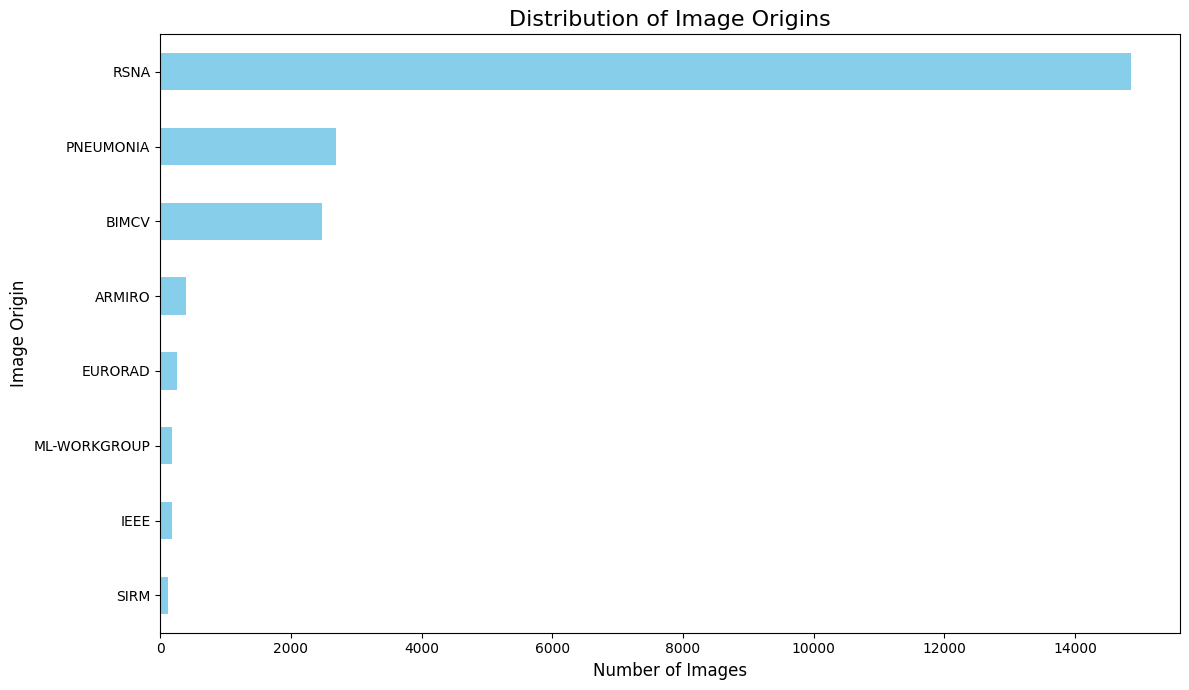

In [18]:
import matplotlib.pyplot as plt

# Create the horizontal bar plot
plt.figure(figsize=(12, 7))
url_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Image Origins', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Image Origin', fontsize=12)
plt.tight_layout()
plt.show()

### Graphiques à barres horizontales pour la distribution des origines des images au sein de chaque groupe (`COVID`, `Lung_Opacity`, `Normal`, `Viral Pneumonia`).

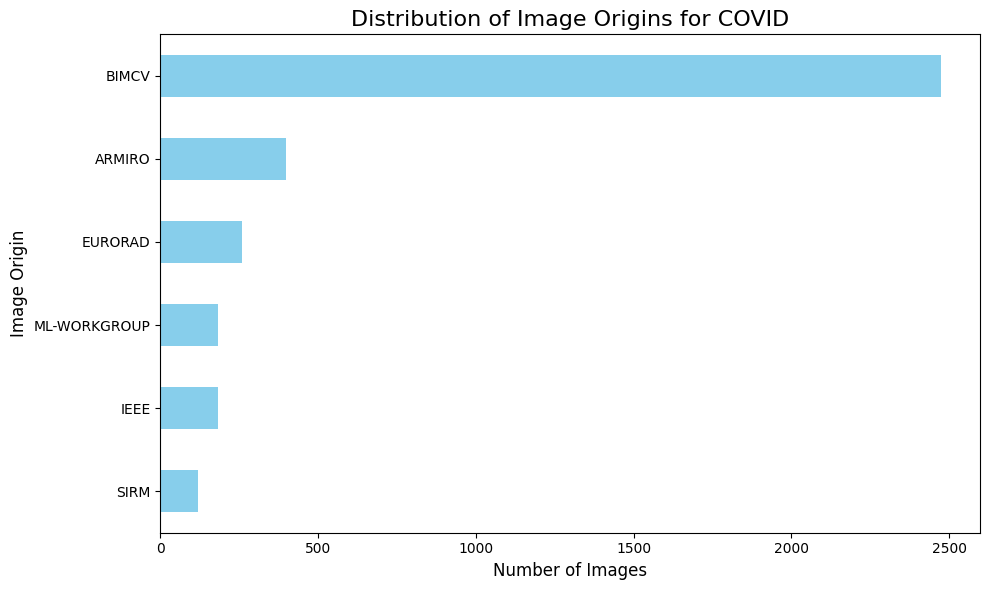

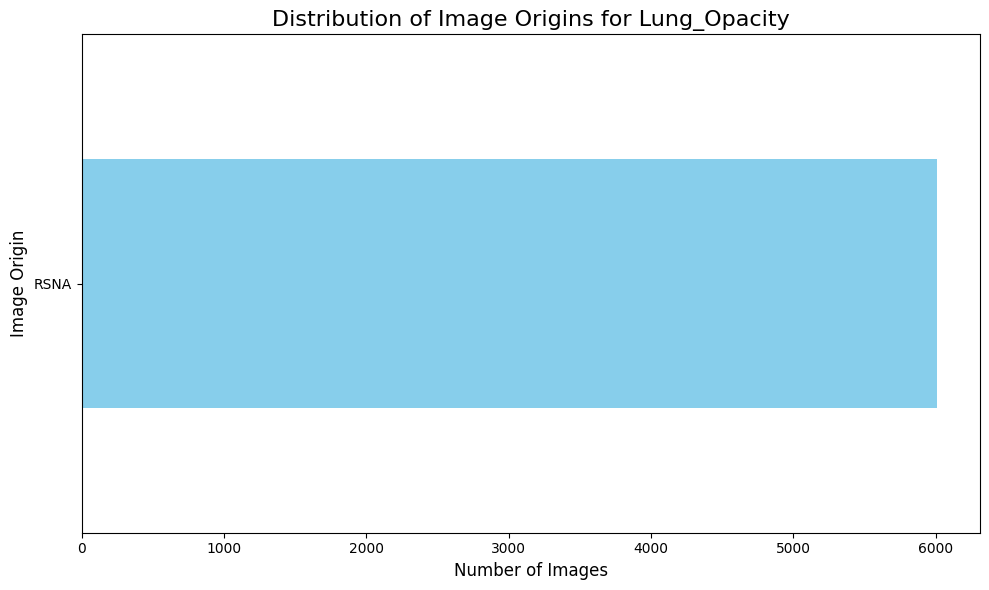

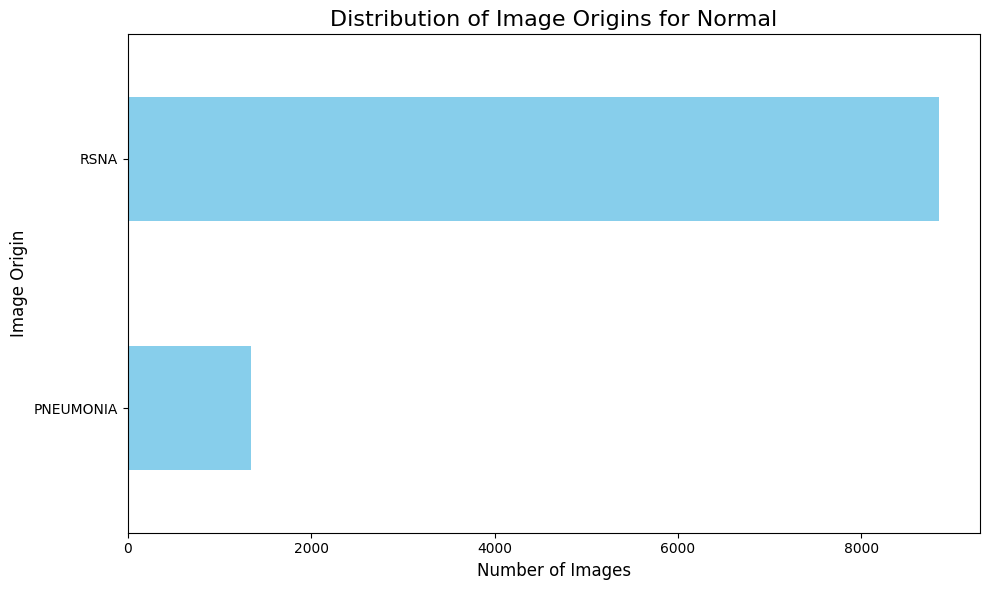

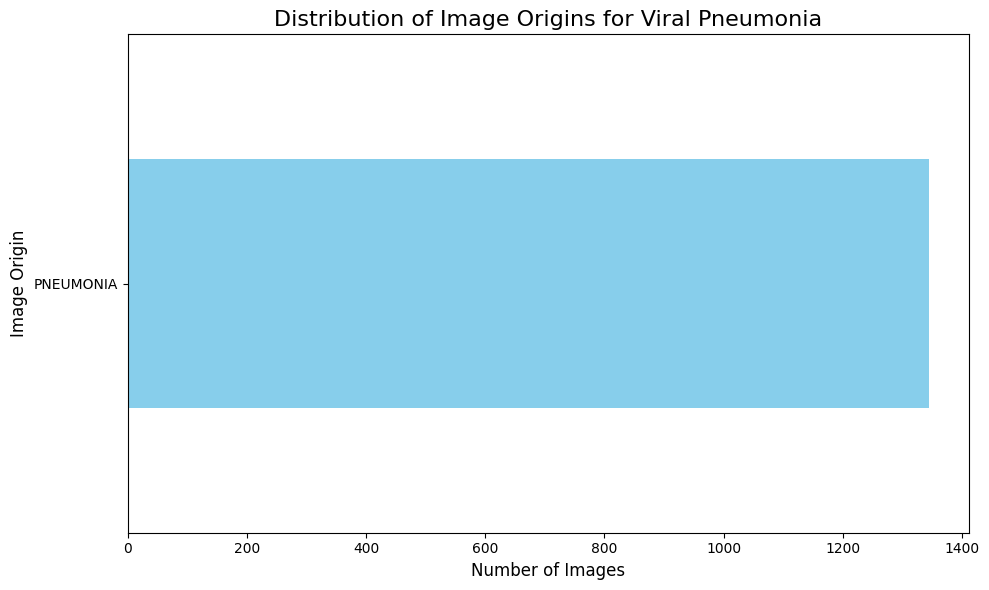

In [19]:
import matplotlib.pyplot as plt

for df_name, df in metadata_dfs.items():
    # Extract group name (e.g., 'COVID' from 'COVID_df')
    group_name = df_name.replace('_df', '')

    # Calculate value counts for the 'URL' column
    url_counts = df['URL'].value_counts()

    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))

    # Generate a horizontal bar plot
    url_counts.sort_values().plot(kind='barh', color='skyblue')

    # Set title and labels
    plt.title(f'Distribution of Image Origins for {group_name}', fontsize=16)
    plt.xlabel('Number of Images', fontsize=12)
    plt.ylabel('Image Origin', fontsize=12)
    plt.tight_layout()
    plt.show()

## Résumé de la distribution de l'origine des images par groupe

### Constatations :

* **Groupe COVID :** Le jeu de données `COVID` provient principalement d’une URL spécifique « BIMCV », qui représente la grande majorité des images (environ 2400+). D’autres sources comme `ARMIRO`, `EURORAD`, `ML-WORKGROUP`, `IEEE` et `SIRM` contribuent un nombre d’images nettement plus faible, chacune avec moins de 500 images.

* **Groupe Lung_Opacity :** Le jeu de données `Lung_Opacity` provient exclusivement de `RSNA`, ce qui indique une seule origine dominante pour l’ensemble des images de cette catégorie (environ 6000+ images).

* **Groupe Normal :** Comme pour le groupe `Lung_Opacity`, le jeu de données `Normal` est également fortement dominé par une seule source, `RSNA`, qui fournit plus de 8500 images. `PNEUMONIA` est l’unique autre source répertoriée, avec un nombre d’images plus faible mais notable (environ 1400+).

* **Groupe Viral Pneumonia :** Ce groupe présente une seule origine d’images, `PNEUMONIA`, qui représente la totalité des images de cette catégorie (environ 1300+ images).

### Synthèse globale :

* **Hétérogénéité des sources de données :** Bien que le jeu de données global soit constitué d’images provenant de multiples sources, la distribution au sein des groupes diagnostiques spécifiques (`COVID`, `Lung_Opacity`, `Normal`, `Viral Pneumonia`) révèle des degrés variables d’hétérogénéité des sources. Certains groupes dépendent presque entièrement d’une seule source (`Lung_Opacity`, `Viral Pneumonia`), tandis que d’autres sont dominés par une source principale avec de faibles contributions d’autres (`COVID`, `Normal`).

* **Sources dominantes :** `RSNA` est un contributeur majeur pour les images `Lung_Opacity` et `Normal`, tandis qu’une URL spécifique (liée à BIMCV-COVID19) est la source principale pour les images `COVID`, et `PNEUMONIA` est la seule source pour `Viral Pneumonia`.

* **Biais potentiels :** La forte dépendance à une seule source, ou à très peu de sources, dans certains groupes peut introduire des biais liés aux protocoles d’imagerie, aux caractéristiques démographiques des patients ou aux présentations cliniques spécifiques à ces sources. C’est un point important à prendre en compte pour toute analyse ultérieure ou tout entraînement de modèle utilisant ces données.


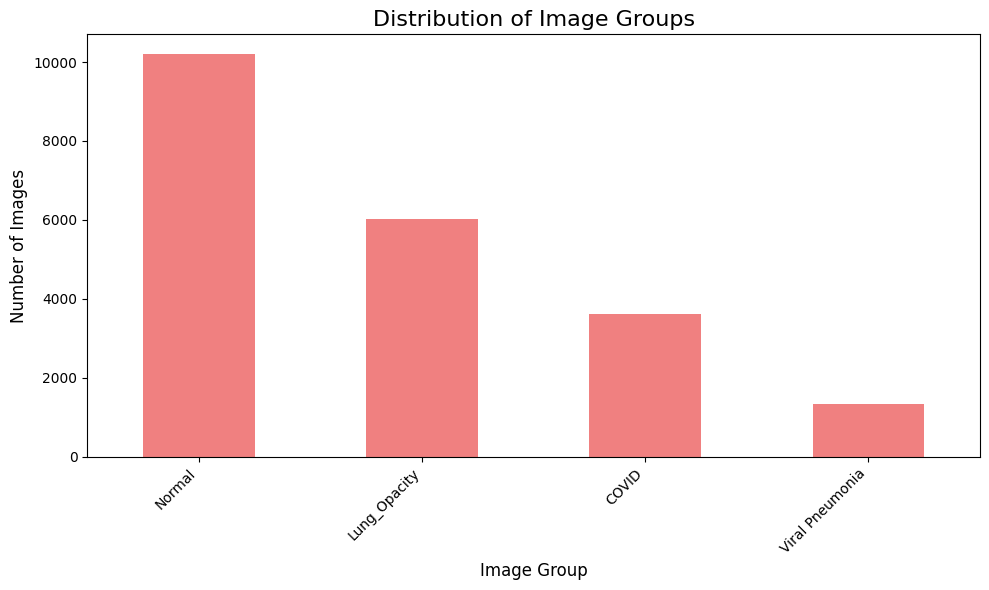

In [20]:
import matplotlib.pyplot as plt

group_counts = pd.Series({
    name.replace('_df', ''): len(df) for name, df in metadata_dfs.items()
})

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
group_counts.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Distribution of Image Groups', fontsize=16)
plt.xlabel('Image Group', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

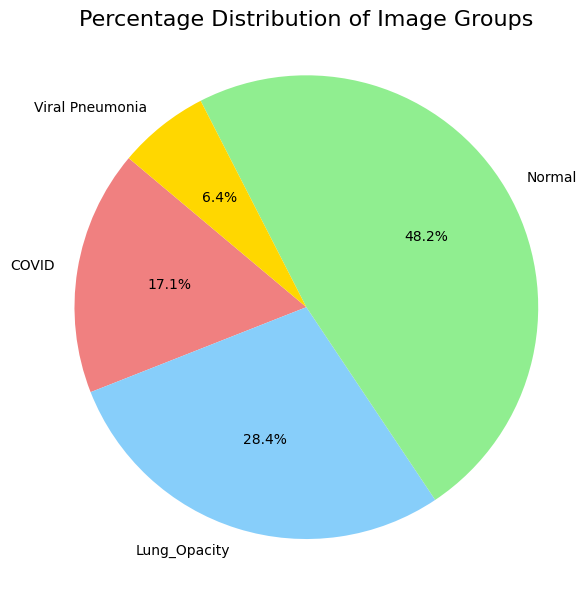

In [21]:
import matplotlib.pyplot as plt

# Create a pie plot
plt.figure(figsize=(6, 6))
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold']
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage Distribution of Image Groups', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Analyse de la distribution des origines des images (URL)

### 1. Distribution globale des origines des images (Graphique 'Distribution of Image Origins') :

Ce graphique présente l'origine de l'ensemble des images du jeu de données :

*   **RSNA** est la source la plus importante, contribuant avec plus de 14 000 images.
*   **PNEUMONIA** est la deuxième source la plus importante, avec plus de 2 000 images.
*   **BIMCV** vient ensuite, avec également plus de 2 000 images.
*   Les autres sources (ARMIRO, EURORAD, ML-WORKGROUP, IEEE, SIRM) contribuent avec un nombre significativement plus faible d'images, toutes en dessous de 500.

### 2. Distribution des origines des images pour chaque groupe :

*   **COVID (Graphique 'Distribution of Image Origins for COVID') :**
    *   **BIMCV** est la source principale des images COVID, représentant environ 2 500 images.
    *   ARMIRO, EURORAD, ML-WORKGROUP, IEEE et SIRM contribuent avec des quantités plus petites, toutes inférieures à 500 images chacune.

*   **Lung_Opacity (Graphique 'Distribution of Image Origins for Lung_Opacity') :**
    *   **RSNA** est la seule et unique source pour le groupe 'Lung_Opacity', avec plus de 6 000 images.

*   **Normal (Graphique 'Distribution of Image Origins for Normal') :**
    *   **RSNA** est la source dominante, avec plus de 8 000 images.
    *   **PNEUMONIA** est l'autre source présente, contribuant avec environ 1 400 images.

*   **Viral Pneumonia (Graphique 'Distribution of Image Origins for Viral Pneumonia') :**
    *   **PNEUMONIA** est la source exclusive pour le groupe 'Viral Pneumonia', avec plus de 1 300 images.

### En résumé :

Ces analyses montrent une forte hétérogénéité dans la provenance des données. Certains groupes, comme 'Lung_Opacity' et 'Viral Pneumonia', dépendent entièrement d'une seule source, ce qui pourrait introduire des biais si les protocoles d'acquisition ou les caractéristiques des patients sont spécifiques à ces sources. Le groupe 'COVID' montre plus de diversité, mais reste dominé par une source principale (BIMCV). La 'Normal' présente deux sources principales avec une dominance de RSNA. Cette distribution est cruciale à considérer pour toute analyse ultérieure ou entraînement de modèles afin de garantir la généralisation.

### Charger et afficher 4 images ainsi que leurs masques correspondants côte à côte en utilisant `matplotlib.pyplot`, dans une grille de sous-graphes 2x4 par catégorie (une ligne pour les images, une ligne pour les masques), avec des titres appropriés.

In [22]:
import os

# Define the list of categories
categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

# Initialize an empty dictionary to store image paths
image_paths = {}

# The base path to the dataset's main content folder
dataset_base_path = os.path.join(dataset_path, 'COVID-19_Radiography_Dataset')

# Construct paths for 'images' and 'masks' for each category
for category in categories:
    # Path for images
    image_dir = os.path.join(dataset_base_path, category, 'images')
    image_paths[f'{category}_images'] = image_dir

    # Path for masks
    mask_dir = os.path.join(dataset_base_path, category, 'masks')
    image_paths[f'{category}_masks'] = mask_dir

# Print the image_paths dictionary to verify
print("Image Paths Dictionary:")
for key, value in image_paths.items():
    print(f"{key}: {value}")

Image Paths Dictionary:
COVID_images: /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images
COVID_masks: /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/masks
Lung_Opacity_images: /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images
Lung_Opacity_masks: /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/masks
Normal_images: /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images
Normal_masks: /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/masks
Viral Pneumonia_images: /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/images
Viral Pneumonia_masks: /kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/Viral Pneumonia/masks


###Analyser les répertoires d’images et de masques pour chaque catégorie (COVID, Lung_Opacity, Normal, Viral Pneumonia) afin de compter les fichiers, identifier les extensions de fichiers, et extraire des propriétés d’images d’exemple (dimensions, canaux, forme). Ensuite, créer et afficher un DataFrame pandas résumant ces informations, puis fournir un résumé de l’analyse.



In [23]:
import os
from PIL import Image
import numpy as np

# Initialize an empty dictionary to store the collected data
analysis_results = {}

# Loop through each category
for category in categories:
    print(f"\nAnalyzing category: {category}")
    category_data = {}

    # Iterate through 'images' and 'masks' directories for the current category
    for subdir_type in ['images', 'masks']:
        dir_key = f'{category}_{subdir_type}'
        current_dir = image_paths[dir_key]

        # Initialize data for the current directory
        dir_info = {
            'file_count': 0,
            'unique_extensions': set(),
            'unique_dimensions': set(),
            'unique_channels': set(),
            'unique_shapes': set()
        }

        # Get a list of all files present in the directory
        all_files = [f for f in os.listdir(current_dir) if os.path.isfile(os.path.join(current_dir, f))]

        # Count the total number of files
        dir_info['file_count'] = len(all_files)

        # Identify unique file extensions
        for f in all_files:
            _, ext = os.path.splitext(f)
            dir_info['unique_extensions'].add(ext.lower())

        # Process a small sample of image files (up to 5)
        image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        # image_files = [f for f in all_files if f.lower().endswith(repr(dir_info['unique_extensions']))]
        # num_samples = min(5, len(image_files))
        # sampled_image_files = random.sample(image_files, num_samples) if num_samples > 0 else []

        # for img_filename in sampled_image_files:
        for img_filename in image_files:
            img_path = os.path.join(current_dir, img_filename)
            try:
                with Image.open(img_path) as img:
                    # Dimensions (width, height)
                    width, height = img.size
                    dir_info['unique_dimensions'].add(f'{width}x{height}')

                    # Number of color channels
                    channels = len(img.getbands())
                    dir_info['unique_channels'].add(channels)

                    # Overall shape (e.g., width, height, channels)
                    img_array = np.array(img)
                    dir_info['unique_shapes'].add(img_array.shape)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

        # Convert sets to lists for better JSON compatibility if needed later, or just for display
        dir_info['unique_extensions'] = sorted(list(dir_info['unique_extensions']))
        dir_info['unique_dimensions'] = sorted(list(dir_info['unique_dimensions']))
        dir_info['unique_channels'] = sorted(list(dir_info['unique_channels']))
        dir_info['unique_shapes'] = sorted(list(dir_info['unique_shapes']))

        category_data[subdir_type] = dir_info

    analysis_results[category] = category_data

# Display the collected analysis results
import json
print("\n--- Analysis Results ---")
print(json.dumps(analysis_results, indent=4))



Analyzing category: COVID

Analyzing category: Lung_Opacity

Analyzing category: Normal

Analyzing category: Viral Pneumonia

--- Analysis Results ---
{
    "COVID": {
        "images": {
            "file_count": 3616,
            "unique_extensions": [
                ".png"
            ],
            "unique_dimensions": [
                "299x299"
            ],
            "unique_channels": [
                1
            ],
            "unique_shapes": [
                [
                    299,
                    299
                ]
            ]
        },
        "masks": {
            "file_count": 3616,
            "unique_extensions": [
                ".png"
            ],
            "unique_dimensions": [
                "256x256"
            ],
            "unique_channels": [
                3
            ],
            "unique_shapes": [
                [
                    256,
                    256,
                    3
                ]
            ]
    

**Je vais maintenant convertir ce dictionnaire en un DataFrame pandas afin de résumer les informations dans un format structuré et lisible.**



In [24]:
import pandas as pd

# Prepare data for DataFrame
data_for_df = []

for category, subdirs_data in analysis_results.items():
    for subdir_type, info in subdirs_data.items():
        row = {
            'Category': category,
            'Subdirectory': subdir_type,
            'File Count': info['file_count'],
            'Unique Extensions': ', '.join(info['unique_extensions']),
            'Unique Dimensions': ', '.join(info['unique_dimensions']),
            'Unique Channels': ', '.join(map(str, info['unique_channels'])),
            'Unique Shapes': ', '.join(map(str, info['unique_shapes']))
        }
        data_for_df.append(row)

# Create DataFrame
analysis_df = pd.DataFrame(data_for_df)

print("Summary DataFrame of Image and Mask Directory Analysis:")
display(analysis_df)


Summary DataFrame of Image and Mask Directory Analysis:


Category Subdirectory  File Count Unique Extensions  \
0            COVID       images        3616              .png   
1            COVID        masks        3616              .png   
2     Lung_Opacity       images        6012              .png   
3     Lung_Opacity        masks        6012              .png   
4           Normal       images       10192              .png   
5           Normal        masks       10192              .png   
6  Viral Pneumonia       images        1345              .png   
7  Viral Pneumonia        masks        1345              .png   

  Unique Dimensions Unique Channels              Unique Shapes  
0           299x299               1                 (299, 299)  
1           256x256               3              (256, 256, 3)  
2           299x299               1                 (299, 299)  
3           256x256               3              (256, 256, 3)  
4           299x299               1                 (299, 299)  
5           256x256               3              (256, 256, 3)  
6           299x299            1, 3  (299, 299), (299, 299, 3)  
7           256x256               3              (256, 256, 3)

## Résumé de l’analyse des répertoires d’images et de masques

Le DataFrame `analysis_df` offre une vue d’ensemble complète des répertoires d’images et de masques pour les différentes catégories (COVID, Lung_Opacity, Normal, Viral Pneumonia). Voici les principaux constats :

* **Nombre de fichiers :**
    * La catégorie `Normal` possède le plus grand nombre d’images et de masques (10192 chacun).
    * `Lung_Opacity` suit avec 6012 images et masques.
    * `COVID` compte 3616 images et masques.
    * `Viral Pneumonia` en possède le moins, avec 1345 images et masques.

* **Extensions uniques :**
    * Toutes les images et tous les masques utilisent uniformément l’extension `.png`.

* **Dimensions uniques :**
    * Pour les **images**, les dimensions sont uniformément `299x299` dans toutes les catégories.
    * Pour les **masques**, les dimensions sont uniformément `256x256` dans toutes les catégories.
    * Cela indique une différence claire de résolution entre les images originales et leurs masques correspondants.

* **Canaux uniques :**
    * La plupart des **images** (COVID, Lung_Opacity, Normal) ont `1` canal, ce qui suggère qu’elles sont en niveaux de gris.
    * Cependant, les images `Viral Pneumonia` présentent à la fois `1` et `3` canaux, ce qui indique un mélange d’images en niveaux de gris et en RGB dans cette catégorie.
    * Tous les **masques** possèdent systématiquement `3` canaux, ce qui est courant pour des images RGB, même si le contenu représente un masque binaire ou en niveaux de gris stocké au format RGB.

* **Formes uniques :**
    * Les formes reflètent directement les informations de dimensions et de canaux.
    * Pour les **images** de COVID, Lung_Opacity et Normal, la forme est `(299, 299)` (grayscale, 2D).
    * Pour les **images Viral Pneumonia**, les formes sont `(299, 299)` et `(299, 299, 3)`, confirmant la présence d’images à 1 canal et 3 canaux.
    * Tous les **masques** ont une forme constante de `(256, 256, 3)`, cohérente avec leurs dimensions 256x256 et leurs 3 canaux.








## Résumé :

### Principales conclusions de l’analyse des données

* **Nombre de fichiers :** La catégorie `Normal` possède le plus grand nombre d’images et de masques avec 10 192 chacun, suivie de `Lung_Opacity` (6 012), `COVID` (3 616), et `Viral Pneumonia` qui en compte le moins avec 1 345 images et masques.
* **Extensions de fichiers :** Tous les fichiers d’images et de masques, dans toutes les catégories, utilisent uniformément l’extension `.png`.
* **Dimensions des images :** Toutes les images ont des dimensions uniformes de `299x299` pixels, tandis que tous les masques ont des dimensions uniformes de `256x256` pixels, indiquant une différence cohérente de résolution entre les images originales et leurs masques correspondants.
* **Canaux de couleur :** La plupart des images (COVID, Lung_Opacity, Normal) sont en niveaux de gris avec `1` canal. Cependant, les images `Viral Pneumonia` présentent un mélange de `1` canal (grayscale) et `3` canaux (RGB). Tous les masques possèdent systématiquement `3` canaux.
* **Formes des images :** Les formes reflètent les dimensions et le nombre de canaux : les images sont en `(299, 299)` ou `(299, 299, 3)` (pour les types mixtes de `Viral Pneumonia`), et tous les masques sont en `(256, 256, 3)`.

### Observations ou prochaines étapes

* La variation du nombre de fichiers entre les catégories suggère un déséquilibre potentiel des classes dans le jeu de données, ce qui peut nécessiter des stratégies comme l’augmentation de données ou l’utilisation de fonctions de perte pondérées lors de l’entraînement du modèle pour éviter les biais.
* Les différences de dimensions (`299x299` pour les images, `256x256` pour les masques) et de canaux (notamment le mélange `1`/`3` canaux dans `Viral Pneumonia`) soulignent la nécessité d’étapes de prétraitement soigneuses, telles que le redimensionnement des masques pour correspondre aux images ou la gestion des variations de canaux, avant d’alimenter les données dans un modèle d’apprentissage automatique.


###Pour chaque catégorie, sélectionner aléatoirement 4 fichiers d’images et leurs fichiers de masques correspondants. Charger ces images et ces masques, puis les afficher côte à côte en utilisant matplotlib.pyplot. Chaque catégorie aura une grille de sous-graphiques montrant 4 images et, en dessous, leurs 4 masques, avec des titres appropriés.



Displaying samples for category: COVID


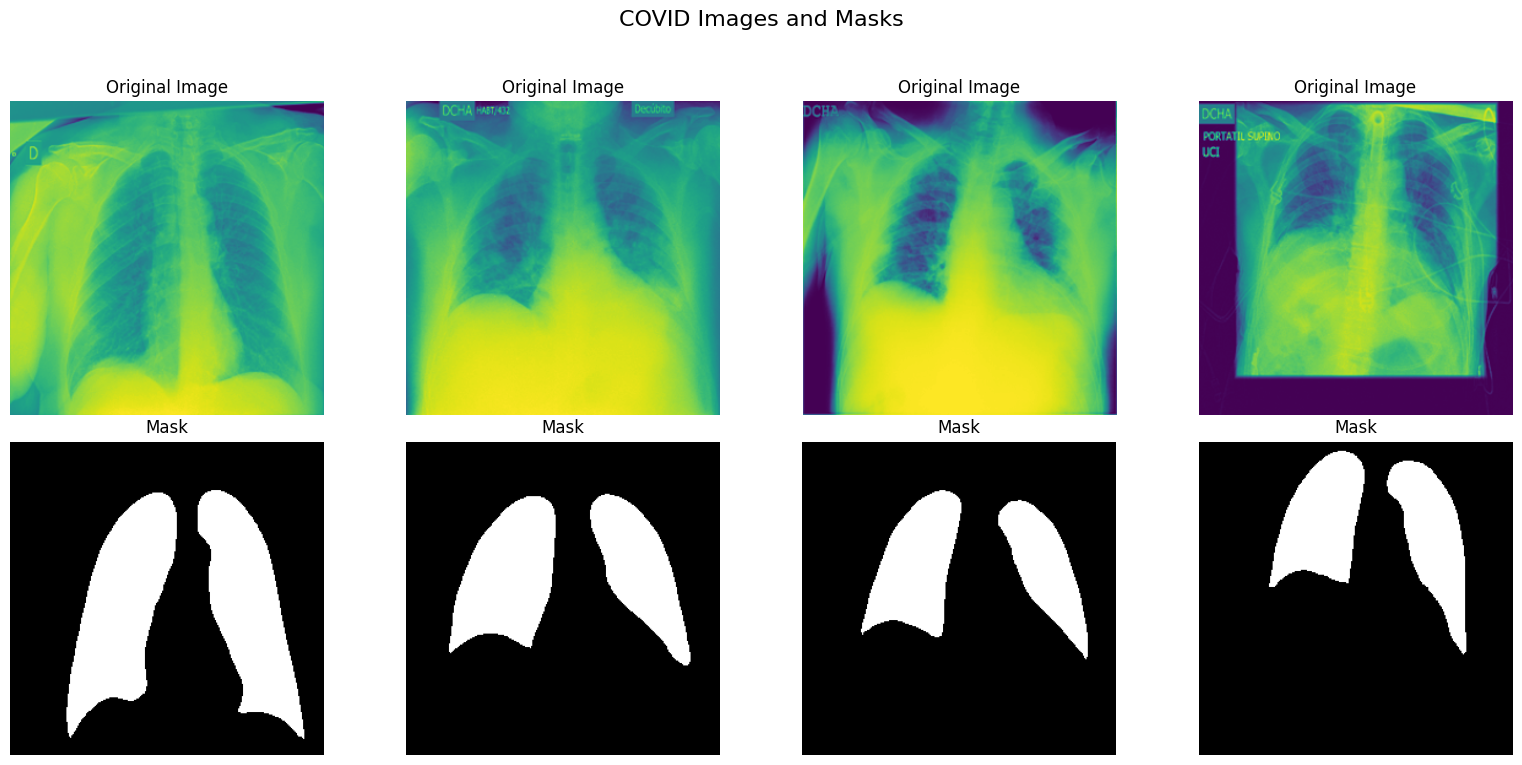


Displaying samples for category: Lung_Opacity


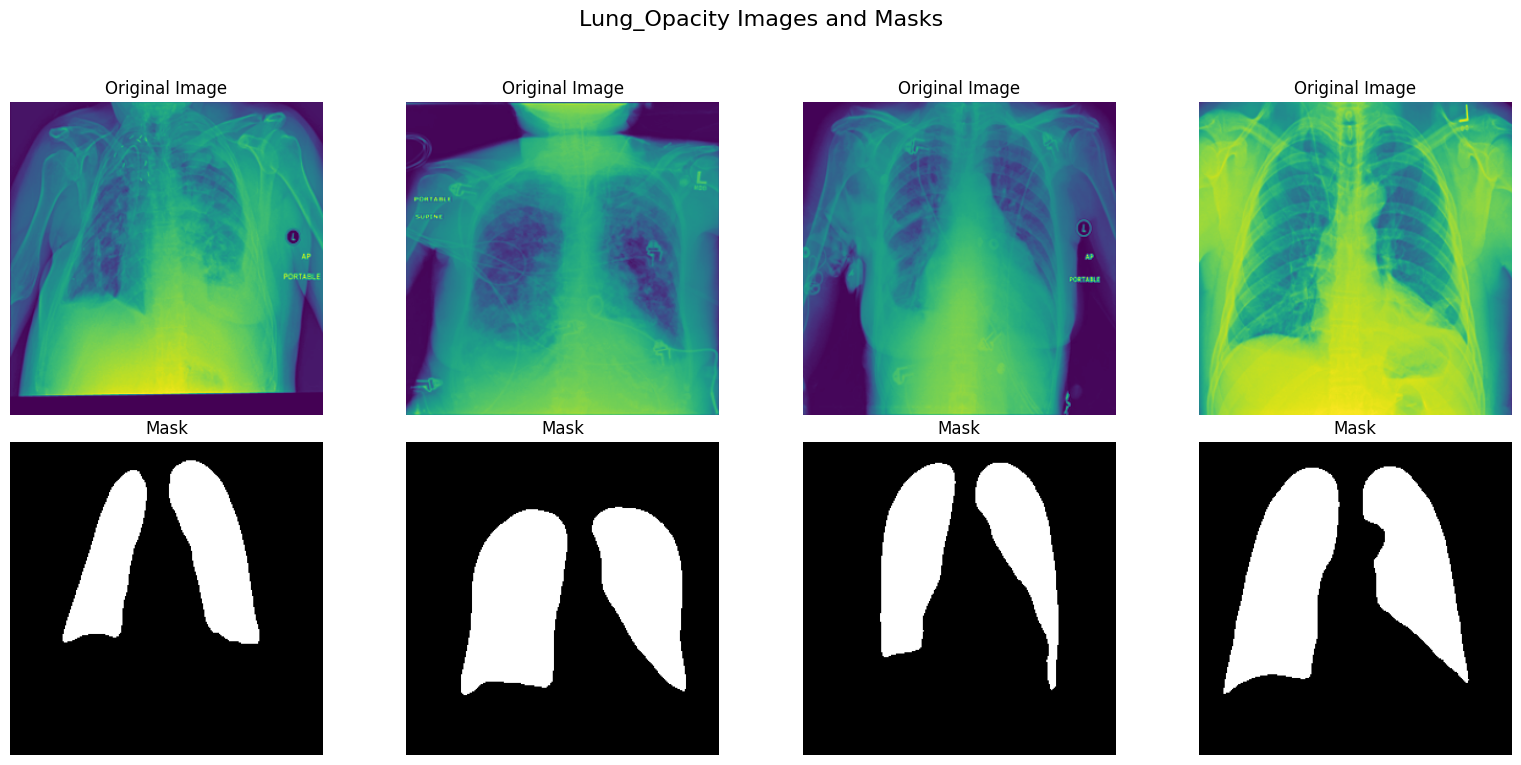


Displaying samples for category: Normal


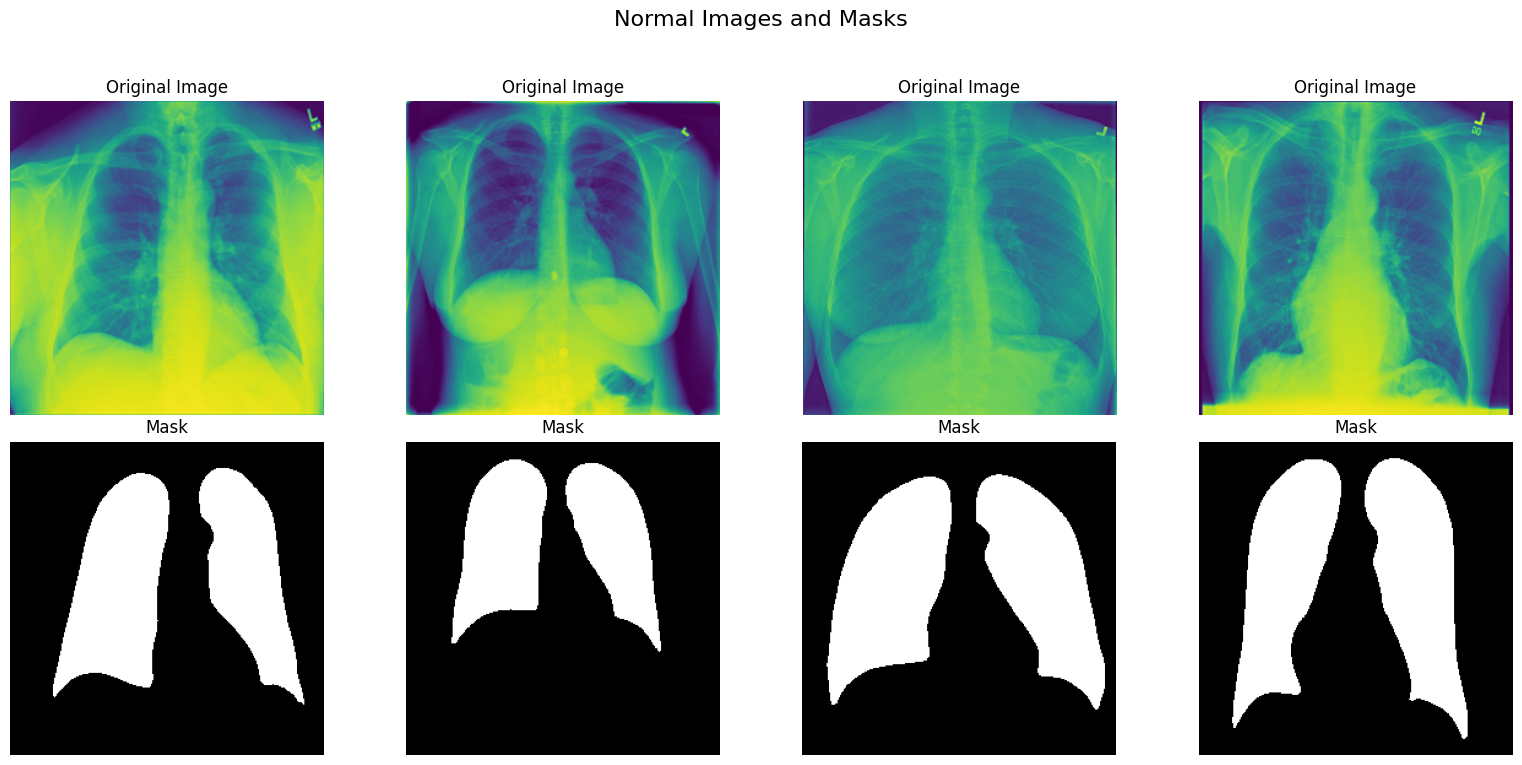


Displaying samples for category: Viral Pneumonia


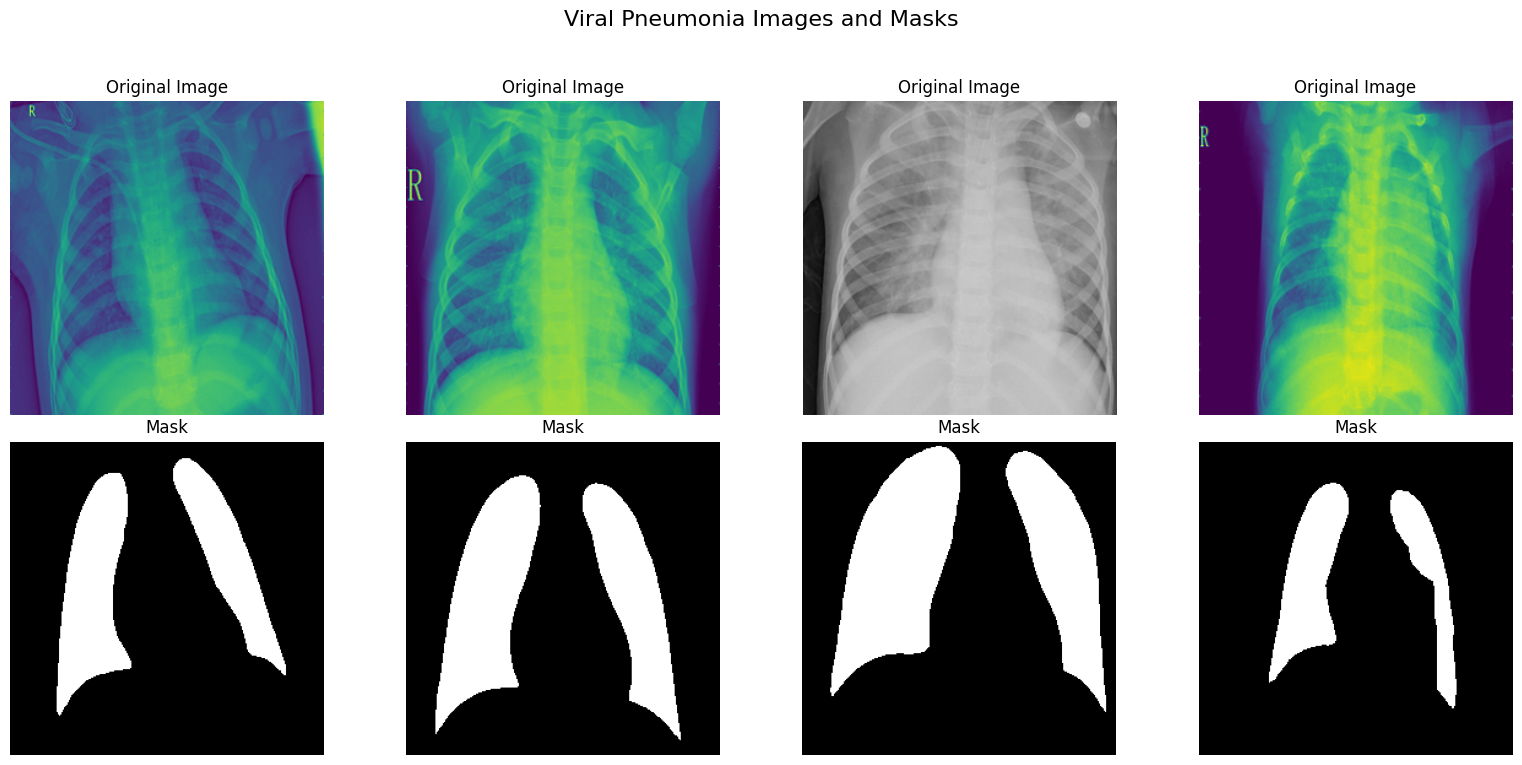

In [25]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

# On suppose que 'categories' et 'image_paths' ont déjà été définis aux étapes précédentes
# categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
# image_paths = { ... dictionnaire rempli ... }

# Boucle sur chaque catégorie pour afficher des exemples d'images et de masques
for category in categories:
    print(f"\nDisplaying samples for category: {category}")

    # Récupérer les répertoires des images et des masques pour la catégorie courante
    current_image_dir = image_paths[f'{category}_images']
    current_mask_dir = image_paths[f'{category}_masks']

    # Obtenir la liste de tous les fichiers image dans la catégorie courante
    all_image_files = [
        f for f in os.listdir(current_image_dir)
        if f.endswith(('.png', '.jpg', '.jpeg'))
    ]

    # Sélectionner aléatoirement 4 fichiers image
    # S'assurer de ne pas sélectionner plus de fichiers qu'il n'en existe
    num_samples = min(4, len(all_image_files))
    selected_image_files = random.sample(all_image_files, num_samples)

    # Créer une figure avec une grille 2 x num_samples de sous-graphiques
    fig = plt.figure(figsize=(4 * num_samples, 8))
    fig.suptitle(f'{category} Images and Masks', fontsize=16)

    # # Si aucune image n'est trouvée pour cette catégorie, on peut ignorer l'affichage
    # if num_samples == 0:
    #     print(f"Aucune image trouvée pour la catégorie {category}.")
    #     plt.close(fig)
    #     continue

    for i, img_filename in enumerate(selected_image_files):
        # Construire les chemins complets pour l'image et le masque
        image_path = os.path.join(current_image_dir, img_filename)
        mask_path = os.path.join(current_mask_dir, img_filename)  # On suppose que le masque porte le même nom de fichier

        # Charger l'image
        img = Image.open(image_path)

        # Charger le masque (s'il existe)
        mask = None
        if os.path.exists(mask_path):
            mask = Image.open(mask_path)
        else:
            print(f"Warning: Mask not found for {img_filename} in {category}.")

        # Afficher l'image originale sur la première ligne
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(img)
        plt.title('Original Image')
        plt.axis('off')

        # Afficher le masque sur la deuxième ligne
        plt.subplot(2, num_samples, num_samples + i + 1)
        if mask:
            # Les masques sont généralement en niveaux de gris
            plt.imshow(mask, cmap='gray')
            plt.title('Mask')
        else:
            # Afficher un texte si le masque est indisponible
            plt.text(
                0.5, 0.5, 'Mask N/A',
                horizontalalignment='center',
                verticalalignment='center',
                transform=plt.transAxes,
                fontsize=12,
                color='red'
            )
        plt.axis('off')

    # Ajuster la mise en page pour laisser de la place au titre principal
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


### Appliquer des filtres de moyenne et de médiane à une image sélectionnée aléatoirement dans chacune des catégories `COVID`, `Lung_Opacity`, `Normal` et `Viral Pneumonia`, puis afficher l’image originale à côté de ses versions filtrées par moyenne et par médiane pour une comparaison visuelle.


In [26]:
from scipy.ndimage import gaussian_filter, median_filter

def apply_mean_filter(image_array, size=3):
    """
    Applies a mean filter (approximated by a Gaussian filter) to an image array.

    Args:
        image_array (np.array): The input image array.
        size (int): The size of the filter. Corresponds to the standard deviation of the Gaussian filter.

    Returns:
        np.array: The filtered image array.
    """
    return gaussian_filter(image_array, sigma=size/2.0)

def apply_median_filter(image_array, size=3):
    """
    Applies a median filter to an image array.

    Args:
        image_array (np.array): The input image array.
        size (int): The size of the filter neighborhood.

    Returns:
        np.array: The filtered image array.
    """
    return median_filter(image_array, size=size)

print("Defined apply_mean_filter and apply_median_filter functions.")

Defined apply_mean_filter and apply_median_filter functions.



Processing category: COVID


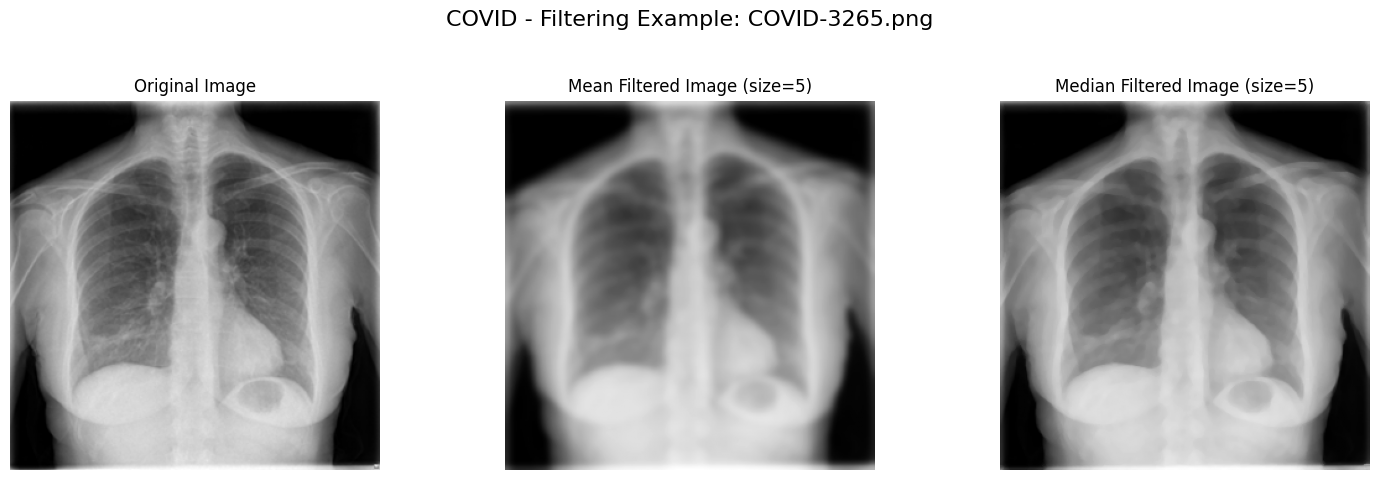


Processing category: Lung_Opacity


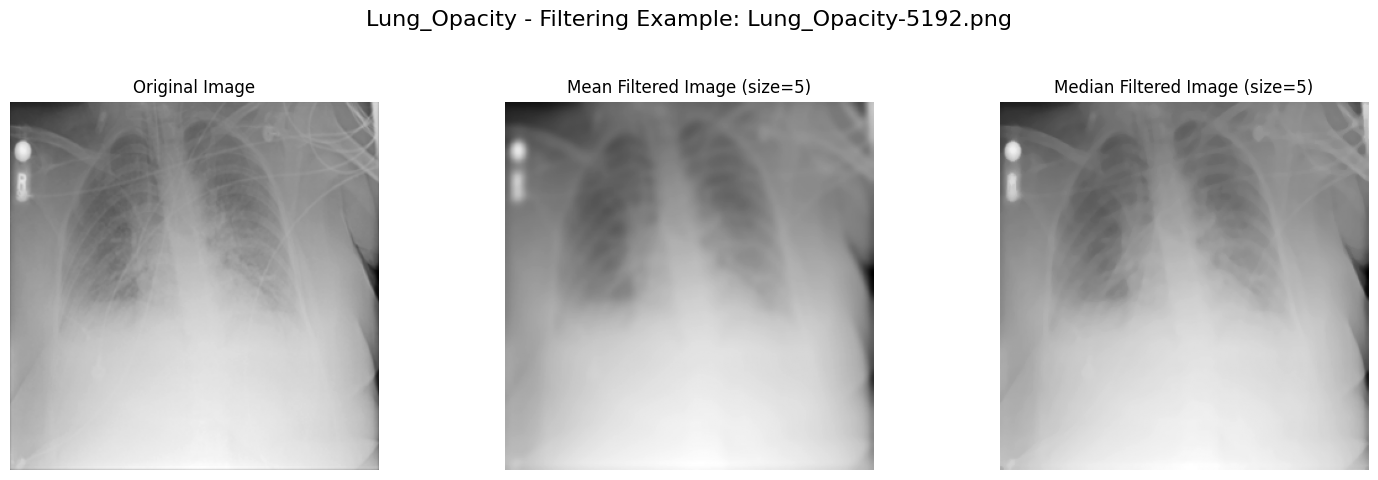


Processing category: Normal


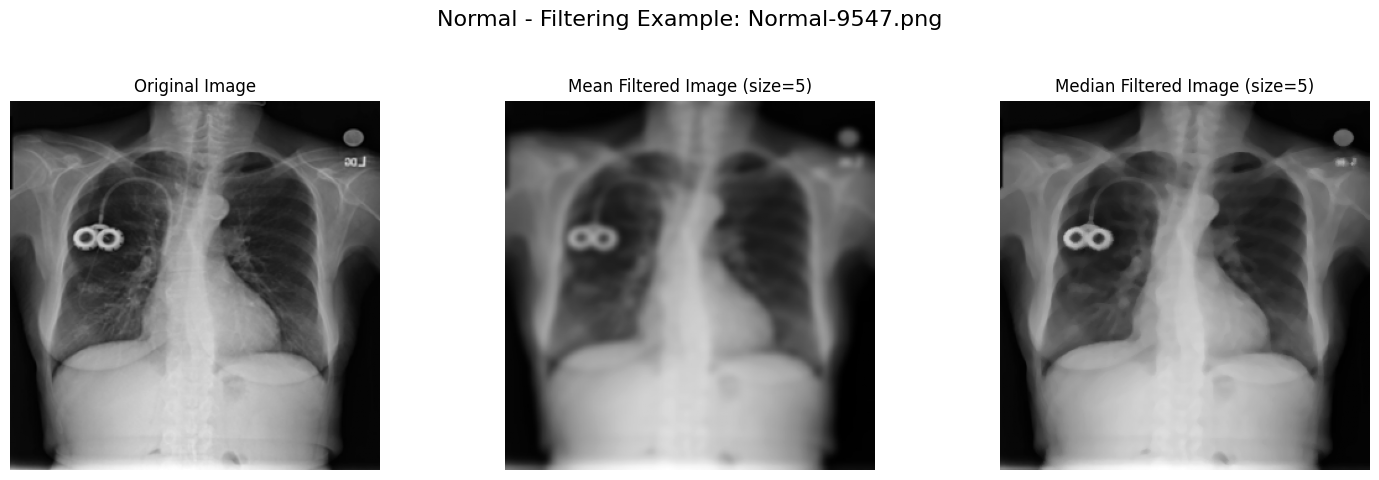


Processing category: Viral Pneumonia


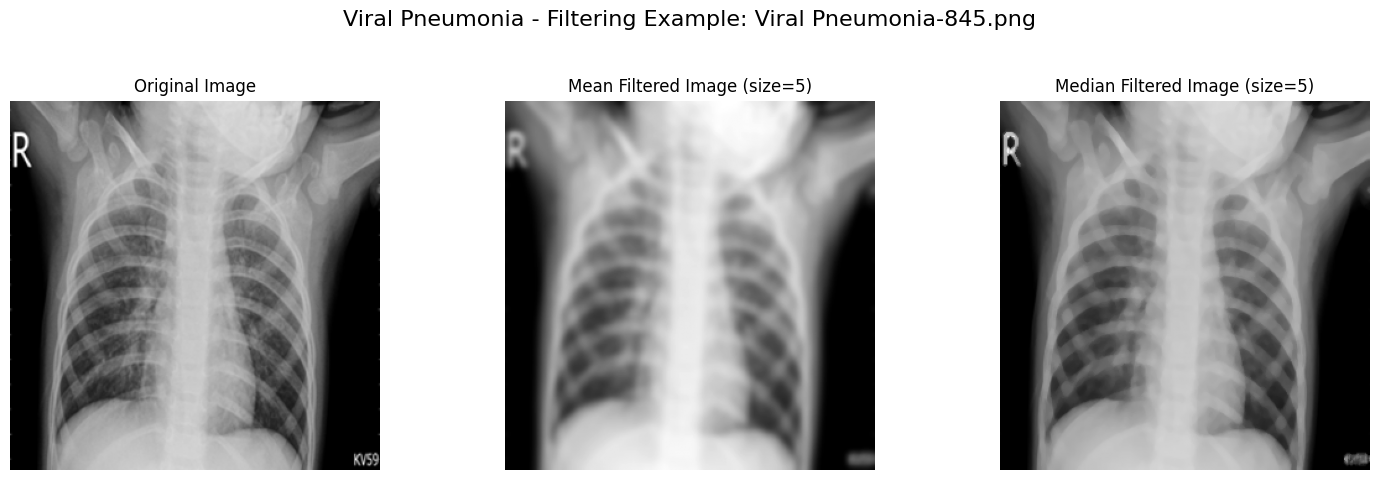

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Make sure image_paths dictionary is available from previous steps
# categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

for category in categories:
    print(f"\nProcessing category: {category}")

    current_image_dir = image_paths[f'{category}_images']
    all_image_files = [f for f in os.listdir(current_image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not all_image_files:
        print(f"No image files found for category {category}. Skipping.")
        continue

    # Select a random image
    selected_img_filename = random.choice(all_image_files)
    image_path = os.path.join(current_image_dir, selected_img_filename)

    try:
        original_img = Image.open(image_path).convert('L') # Convert to grayscale for 2D filtering
        original_img_array = np.array(original_img)

        # Apply filters
        mean_filtered_img = apply_mean_filter(original_img_array, size=5)
        median_filtered_img = apply_median_filter(original_img_array, size=5)

        # Display images
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'{category} - Filtering Example: {selected_img_filename}', fontsize=16)

        axes[0].imshow(original_img_array, cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        axes[1].imshow(mean_filtered_img, cmap='gray')
        axes[1].set_title('Mean Filtered Image (size=5)')
        axes[1].axis('off')

        axes[2].imshow(median_filtered_img, cmap='gray')
        axes[2].set_title('Median Filtered Image (size=5)')
        axes[2].axis('off')

        plt.tight_layout(rect=[0, 0.03, 1, 0.9])
        plt.show()

    except Exception as e:
        print(f"Error processing image {selected_img_filename} for category {category}: {e}")

## Calculer les statistiques de luminosité (moyenne, écart-type et intensité maximale des pixels) pour chaque image dans les catégories `COVID`, `Lung_Opacity`, `Normal` et `Viral Pneumonia`, stocker ces statistiques dans une liste, puis convertir cette liste en un DataFrame pandas, et enfin générer et afficher des graphiques KDE pour visualiser la distribution de la moyenne, de l’écart-type et de la luminosité maximale pour chaque catégorie.


In [28]:
import os
from PIL import Image
import numpy as np

luminosity_data = []

# Assuming 'categories' and 'image_paths' are available from previous steps
# categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
# image_paths = { ... dictionary filled ... }

for category in categories:
    print(f"Processing luminosity for category: {category}")
    current_image_dir = image_paths[f'{category}_images']

    all_image_files = [
        f for f in os.listdir(current_image_dir)
        if f.lower().endswith(('.png', '.jpg', '.jpeg'))
    ]

    for img_filename in all_image_files:
        image_path = os.path.join(current_image_dir, img_filename)
        try:
            # Open image and convert to grayscale
            img = Image.open(image_path).convert('L')
            img_array = np.array(img)

            # Calculate statistics
            mean_luminosity = np.mean(img_array)
            std_luminosity = np.std(img_array)
            max_luminosity = np.max(img_array)

            # Store statistics
            luminosity_data.append({
                'category': category,
                'file_name': img_filename,
                'mean_luminosity': mean_luminosity,
                'std_luminosity': std_luminosity,
                'max_luminosity': max_luminosity
            })
        except Exception as e:
            print(f"Error processing image {img_filename} in category {category}: {e}")

print(f"Finished processing luminosity data for {len(luminosity_data)} images.")

Processing luminosity for category: COVID
Processing luminosity for category: Lung_Opacity
Processing luminosity for category: Normal
Processing luminosity for category: Viral Pneumonia
Finished processing luminosity data for 21165 images.


In [29]:
import pandas as pd

luminosity_df = pd.DataFrame(luminosity_data)

print("Luminosity statistics DataFrame created successfully.")
print("First 5 rows of luminosity_df:")
display(luminosity_df.head())

print("\nInfo of luminosity_df:")
luminosity_df.info()

Luminosity statistics DataFrame created successfully.
First 5 rows of luminosity_df:


category       file_name  mean_luminosity  std_luminosity  max_luminosity
0    COVID  COVID-1994.png       146.102627       52.955682             252
1    COVID  COVID-1825.png       110.959643       35.869405             246
2    COVID   COVID-517.png       121.718381       55.491307             224
3    COVID   COVID-532.png       141.458362       70.955457             242
4    COVID  COVID-2272.png        98.669377       65.566765             248


Info of luminosity_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         21165 non-null  object 
 1   file_name        21165 non-null  object 
 2   mean_luminosity  21165 non-null  float64
 3   std_luminosity   21165 non-null  float64
 4   max_luminosity   21165 non-null  uint8  
dtypes: float64(2), object(2), uint8(1)
memory usage: 682.2+ KB


In [30]:
luminosity_df.describe()

mean_luminosity  std_luminosity  max_luminosity
count     21165.000000    21165.000000    21165.000000
mean        129.908506       59.017312      243.812237
std          23.491756       11.104801       15.987435
min          25.511381       14.145251       77.000000
25%         113.313184       51.657089      241.000000
50%         127.133891       60.104209      250.000000
75%         146.682901       67.152950      255.000000
max         229.141676      106.998675      255.000000

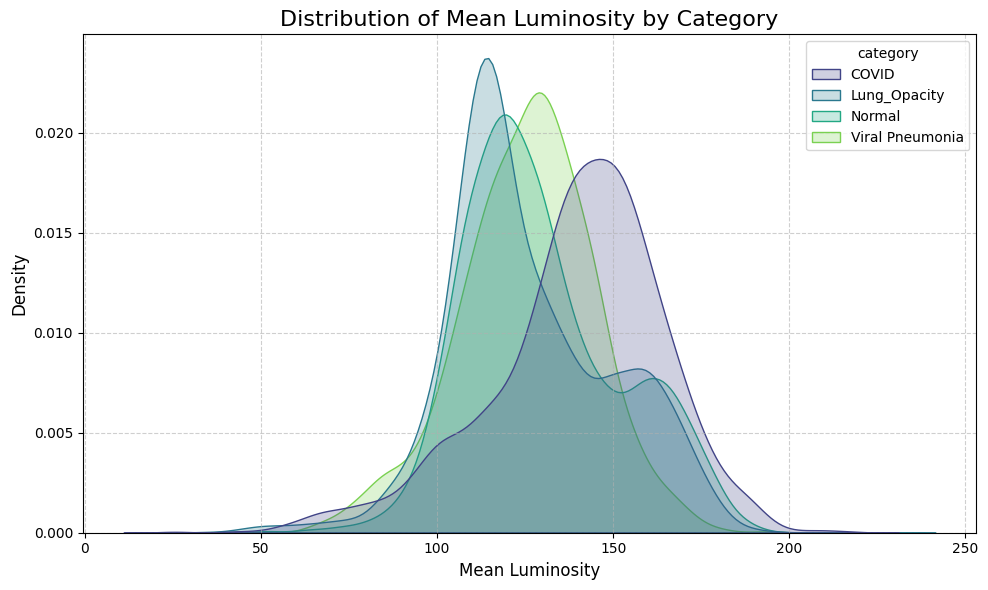

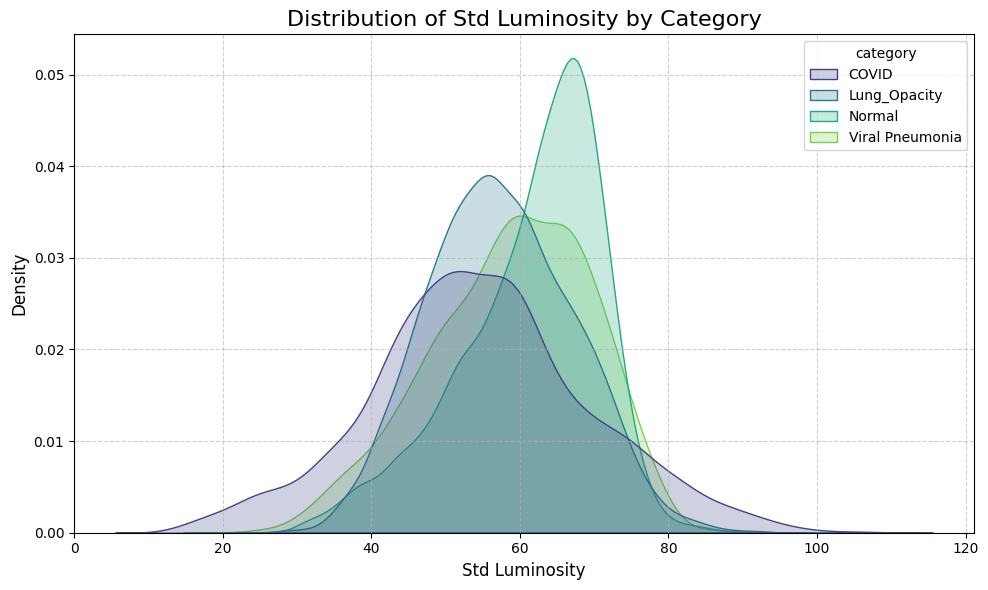

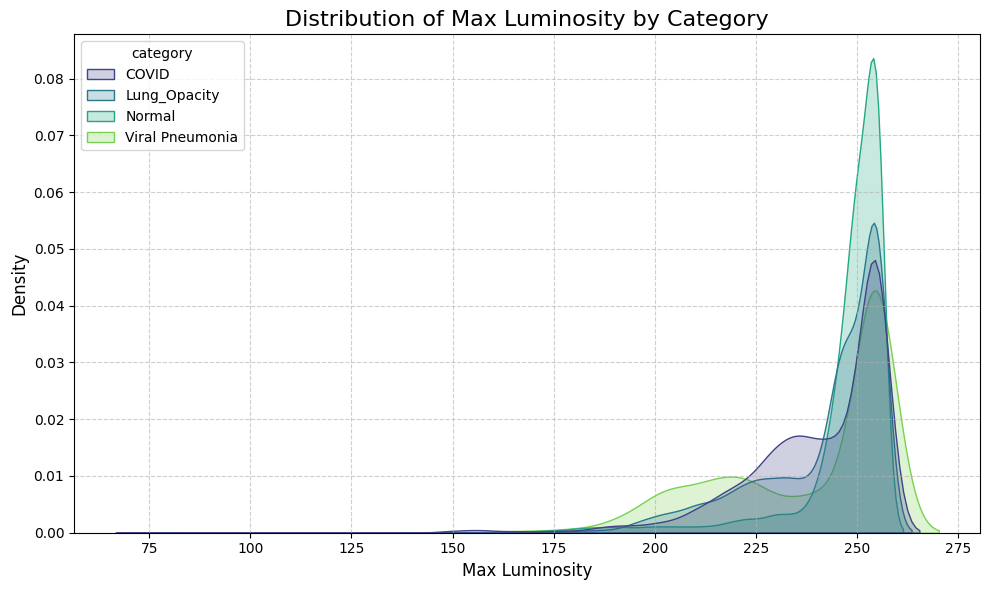

KDE plots for luminosity statistics by category generated successfully.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the luminosity statistics to plot
luminosity_stats_cols = ['mean_luminosity', 'std_luminosity', 'max_luminosity']

# Loop through each statistic and generate a KDE plot
for col in luminosity_stats_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=luminosity_df, x=col, hue='category', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Distribution of {col.replace("_", " ").title()} by Category', fontsize=16)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Density', fontsize=12)
    # Removed plt.legend(title='Category') to allow seaborn to handle the legend automatically
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

print("KDE plots for luminosity statistics by category generated successfully.")

## nous ne pouvons pas conclure grande chose de ces distrubitions de l'intensité des images, sauf que les niveaux des images COVID sont un peu moins que les autres catégories

##Pour chaque catégorie (`COVID`, `Lung_Opacity`, `Normal`, `Viral Pneumonia`), sélectionner 4 fichiers d’images aléatoires, les charger en niveaux de gris, calculer leurs histogrammes, puis afficher chaque image en niveaux de gris accompagnée de son histogramme à l’aide de `matplotlib.pyplot`.


In [32]:
import random
import os
from PIL import Image
import numpy as np

# Initialize an empty list to store information about selected images
selected_images_data = []

# Loop through each category
for category in categories:
    print(f"Selecting and loading images for category: {category}")

    # Get the path to the current category's image directory
    current_image_dir = image_paths[f'{category}_images']

    # Get a list of all image files in the directory
    all_image_files = [
        f for f in os.listdir(current_image_dir)
        if f.lower().endswith(('.png', '.jpg', '.jpeg'))
    ]

    # Randomly select up to 4 image filenames
    num_samples = min(4, len(all_image_files))
    selected_filenames = random.sample(all_image_files, num_samples)

    # Process each selected image
    for img_filename in selected_filenames:
        image_path = os.path.join(current_image_dir, img_filename)
        try:
            # Open image and convert to grayscale
            img = Image.open(image_path).convert('L')
            img_array = np.array(img)

            # Store the information
            selected_images_data.append({
                'category': category,
                'image_path': image_path,
                'file_name': img_filename,
                'grayscale_image_array': img_array
            })
        except Exception as e:
            print(f"Error loading or processing {img_filename} in {category}: {e}")

print(f"Finished selecting and loading {len(selected_images_data)} images.")

# Display some information about the collected data (optional, for verification)
print("\nSample of selected_images_data:")
for i, item in enumerate(selected_images_data[:5]): # Display first 5 items
    print(f"Item {i+1}:")
    print(f"  Category: {item['category']}")
    print(f"  File Name: {item['file_name']}")
    print(f"  Image Array Shape: {item['grayscale_image_array'].shape}")
    print(f"  Image Array Dtype: {item['grayscale_image_array'].dtype}")


Selecting and loading images for category: COVID
Selecting and loading images for category: Lung_Opacity
Selecting and loading images for category: Normal
Selecting and loading images for category: Viral Pneumonia
Finished selecting and loading 16 images.

Sample of selected_images_data:
Item 1:
  Category: COVID
  File Name: COVID-1979.png
  Image Array Shape: (299, 299)
  Image Array Dtype: uint8
Item 2:
  Category: COVID
  File Name: COVID-15.png
  Image Array Shape: (299, 299)
  Image Array Dtype: uint8
Item 3:
  Category: COVID
  File Name: COVID-850.png
  Image Array Shape: (299, 299)
  Image Array Dtype: uint8
Item 4:
  Category: COVID
  File Name: COVID-689.png
  Image Array Shape: (299, 299)
  Image Array Dtype: uint8
Item 5:
  Category: Lung_Opacity
  File Name: Lung_Opacity-5738.png
  Image Array Shape: (299, 299)
  Image Array Dtype: uint8


###**À présent, je calcule l’histogramme pour chacun de ces tableaux d’images en niveaux de gris et je le stocke dans la structure selected_images_data. Cela prépare les données pour l’étape de visualisation (tracé des graphiques)**



In [33]:
import matplotlib.pyplot as plt

# Iterate through the selected images and calculate histograms
for item in selected_images_data:
    img_array = item['grayscale_image_array']

    # Calculate histogram
    # hist, bins = np.histogram(img_array.flatten(), bins=256, range=[0, 256])

    # Matplotlib's hist function returns the histogram values and bin edges
    hist_values, bin_edges = np.histogram(img_array.flatten(), bins=256, range=[0, 256])

    # Store the histogram values and bin edges (or just values if preferred) in the dictionary
    item['histogram_values'] = hist_values
    item['histogram_bin_edges'] = bin_edges

print("Histograms calculated for all selected grayscale images.")

# Optional: Verify by printing histogram details for a sample image
if selected_images_data:
    print("\nSample histogram data for the first image:")
    sample_item = selected_images_data[0]
    print(f"  Category: {sample_item['category']}")
    print(f"  File Name: {sample_item['file_name']}")
    print(f"  Histogram Values (first 10): {sample_item['histogram_values'][:10]}")
    print(f"  Histogram Bin Edges (first 10): {sample_item['histogram_bin_edges'][:10]}")

Histograms calculated for all selected grayscale images.

Sample histogram data for the first image:
  Category: COVID
  File Name: COVID-1979.png
  Histogram Values (first 10): [  0   0   4  10  75 195 368 515 492 289]
  Histogram Bin Edges (first 10): [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


###**Je vais afficher chaque image en niveaux de gris accompagnée de son histogramme en utilisant matplotlib.pyplot.**



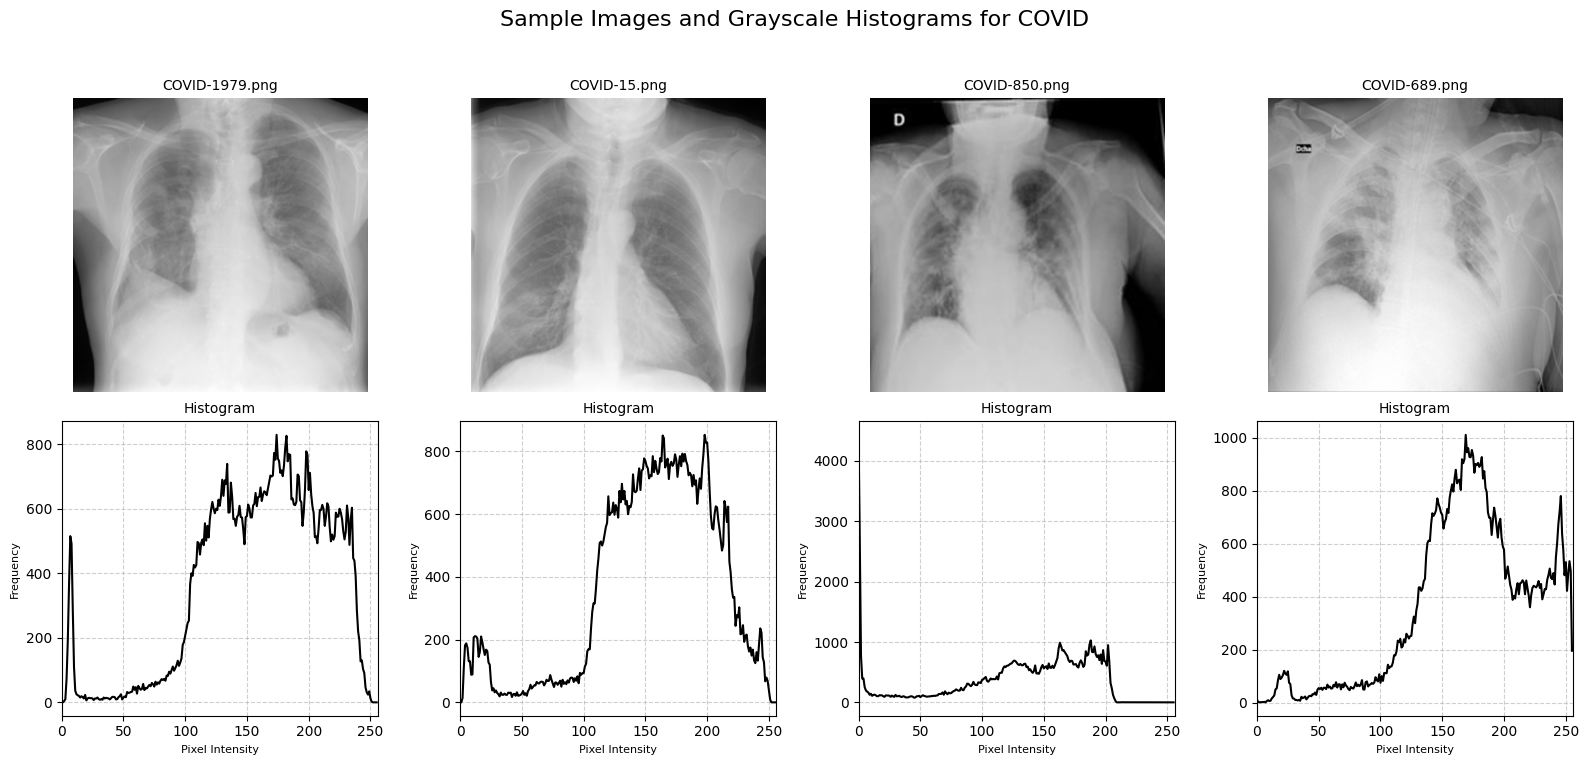

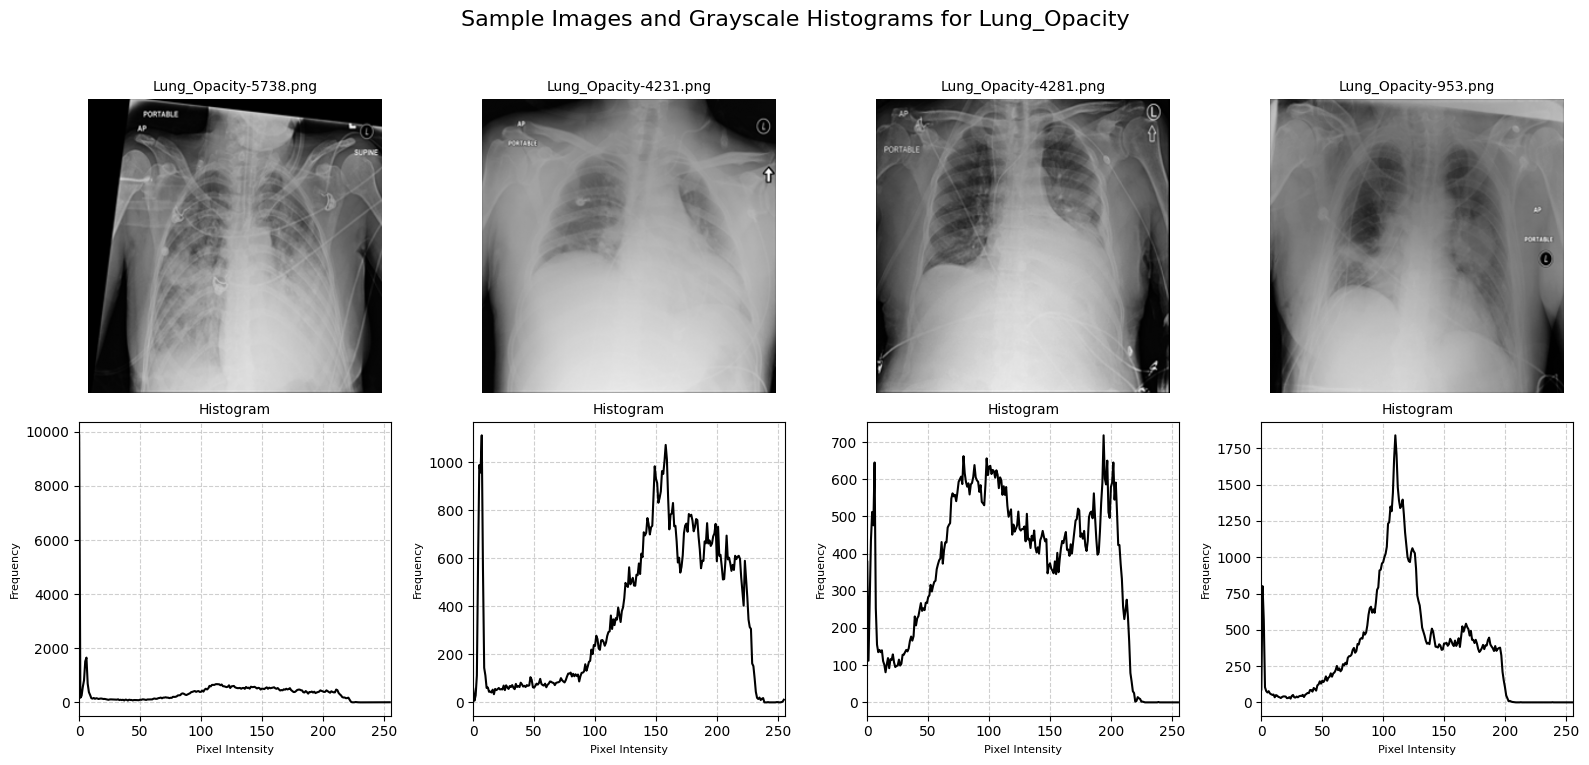

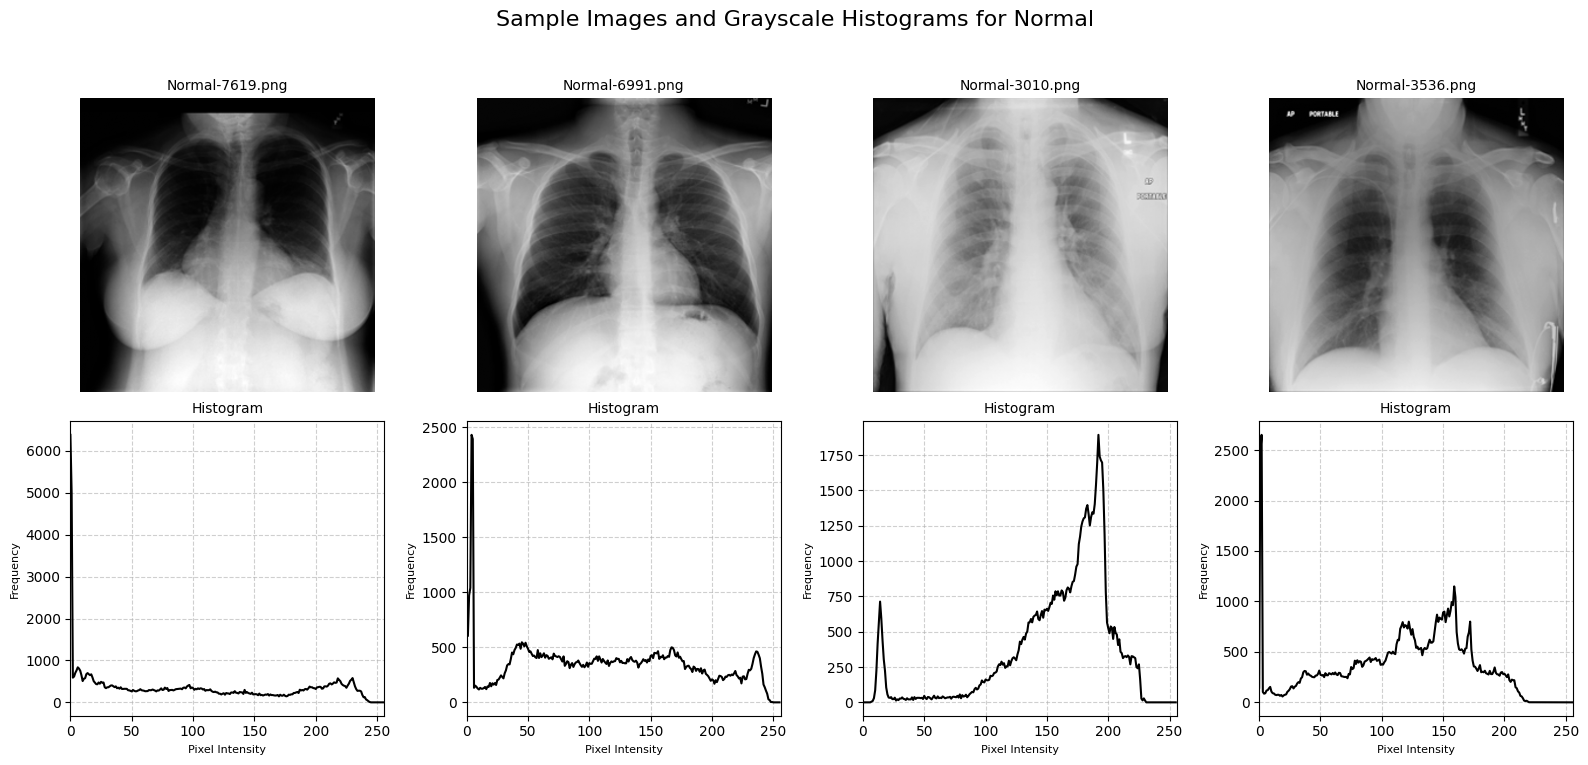

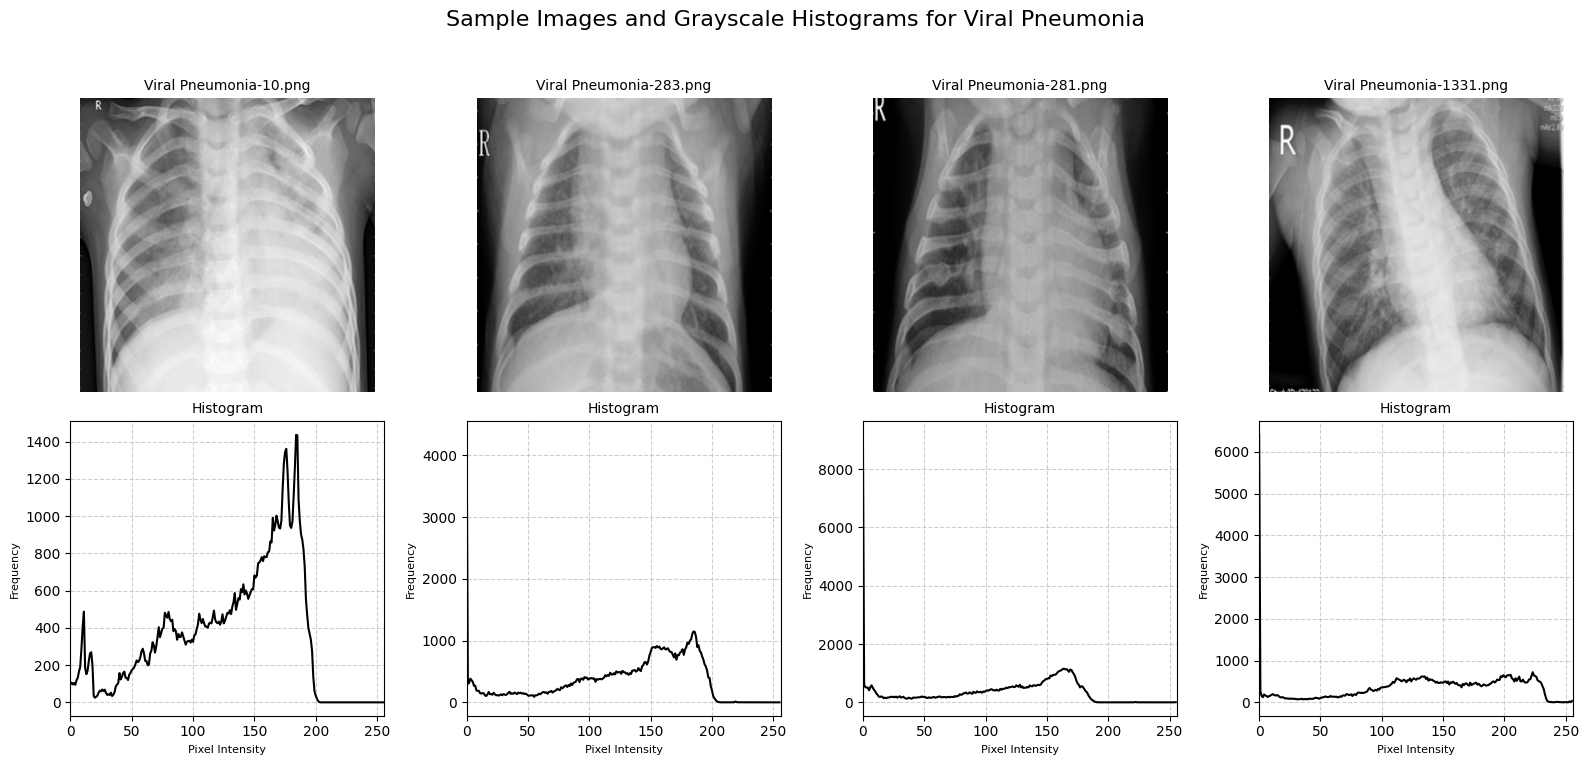

Finished displaying sample images and their grayscale histograms by category.


In [34]:
import matplotlib.pyplot as plt

# Loop through each category to display images and their histograms
current_category = None
fig_num = 0

for item in selected_images_data:
    category = item['category']

    # If the category changes, start a new figure for the new category
    if category != current_category:
        if current_category is not None:
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()

        current_category = category
        fig_num += 1
        # Create a figure with 2 rows and 4 columns for each category
        # First row for images, second row for histograms
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        fig.suptitle(f'Sample Images and Grayscale Histograms for {category}', fontsize=16)
        plot_idx = 0

    # Get the image array and histogram data
    img_array = item['grayscale_image_array']
    hist_values = item['histogram_values']
    bin_edges = item['histogram_bin_edges']

    # Display the grayscale image in the first row
    axes[0, plot_idx].imshow(img_array, cmap='gray')
    axes[0, plot_idx].set_title(item['file_name'], fontsize=10)
    axes[0, plot_idx].axis('off')

    # Display the histogram in the second row
    axes[1, plot_idx].plot(bin_edges[:-1], hist_values, color='black')
    axes[1, plot_idx].set_title('Histogram', fontsize=10)
    axes[1, plot_idx].set_xlabel('Pixel Intensity', fontsize=8)
    axes[1, plot_idx].set_ylabel('Frequency', fontsize=8)
    axes[1, plot_idx].set_xlim([0, 256])
    axes[1, plot_idx].grid(True, linestyle='--', alpha=0.6)

    plot_idx += 1

# Display the last figure
if current_category is not None:
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("Finished displaying sample images and their grayscale histograms by category.")

In [35]:
max_frequency = 0
for item in selected_images_data:
    hist_values = item['histogram_values']
    max_frequency = max(max_frequency, hist_values.max())

print(f"Maximum frequency across all histograms: {max_frequency}")

Maximum frequency across all histograms: 9871


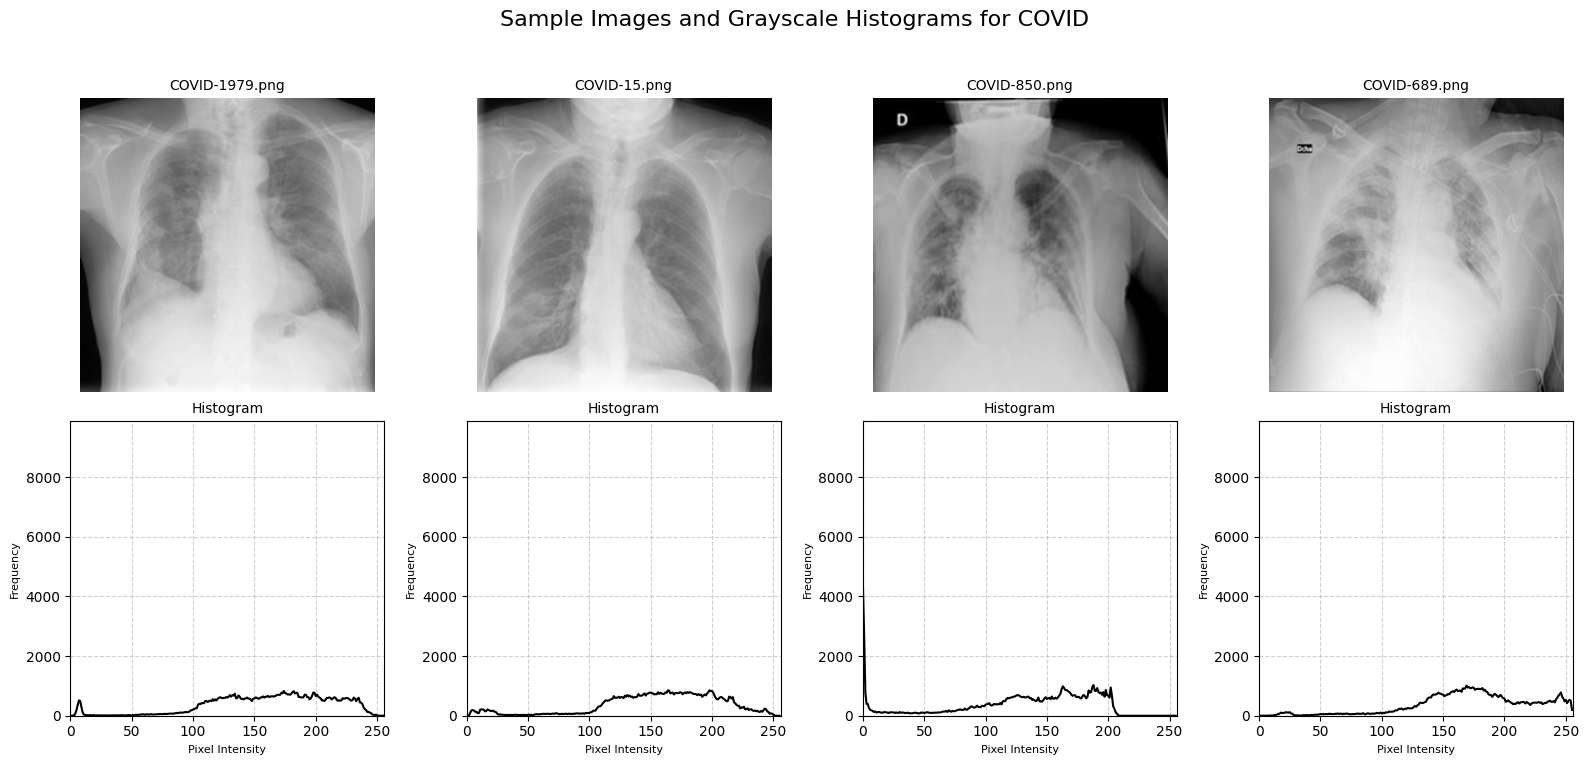

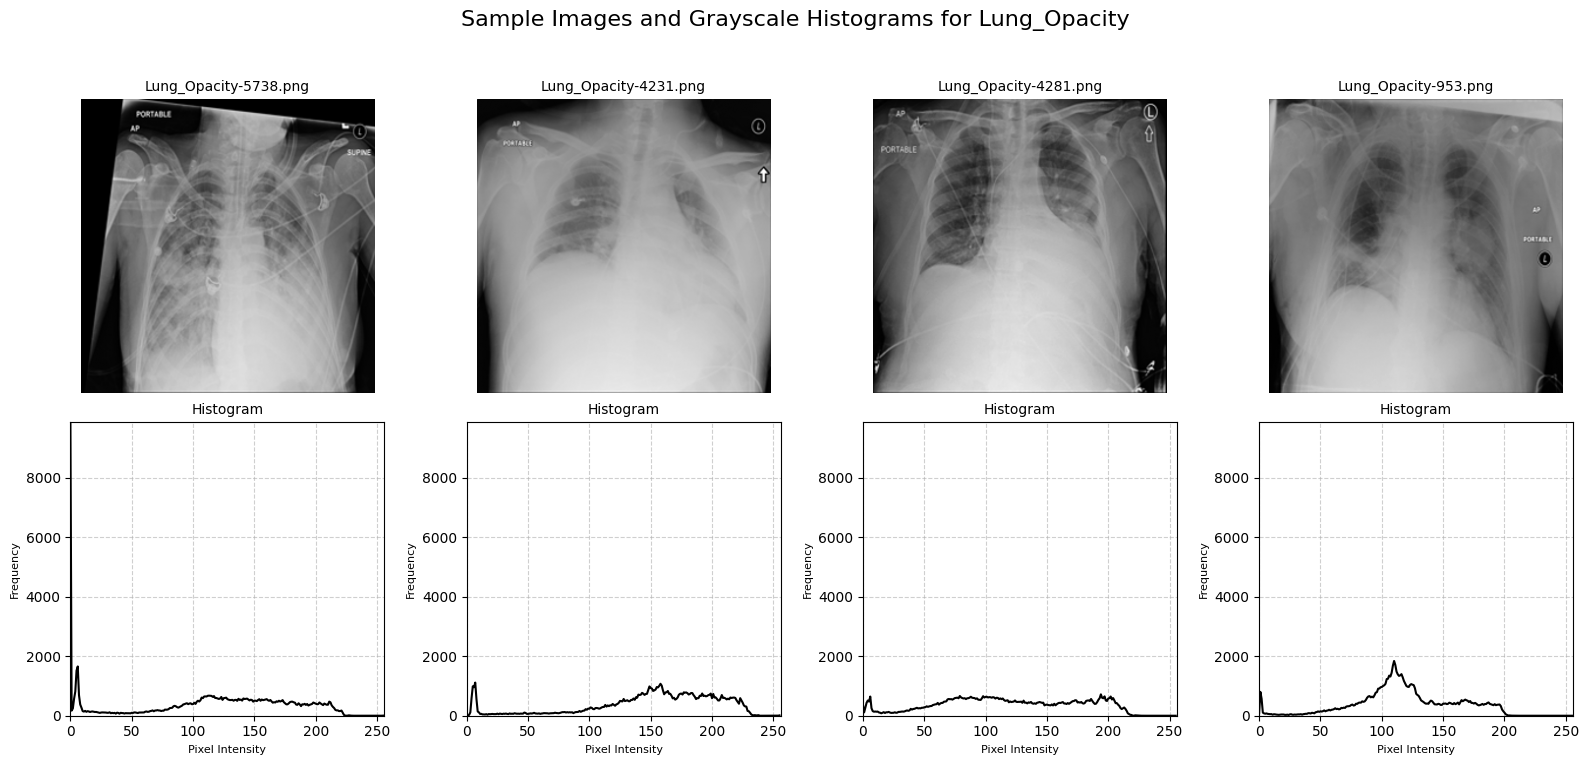

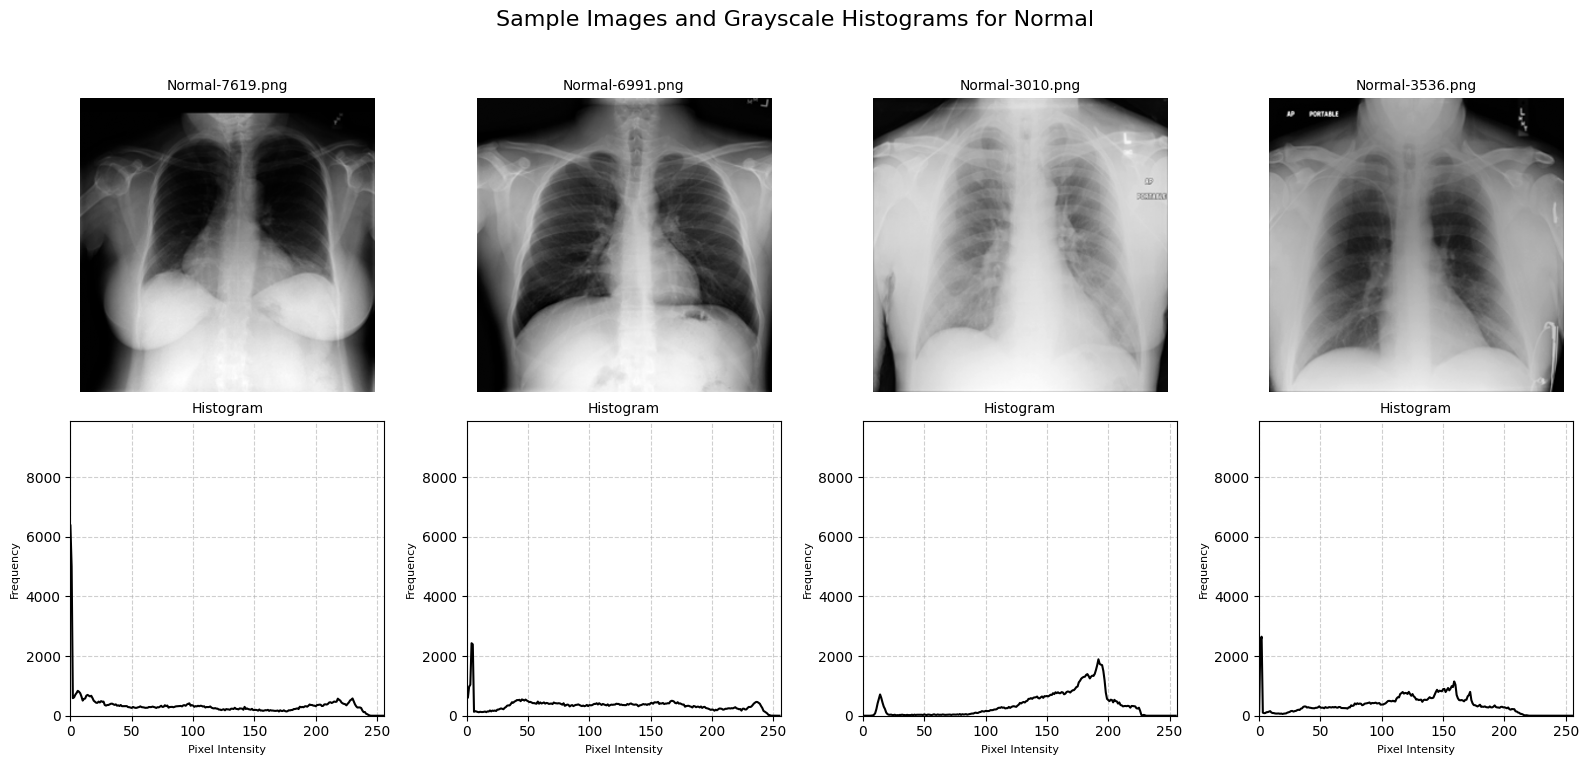

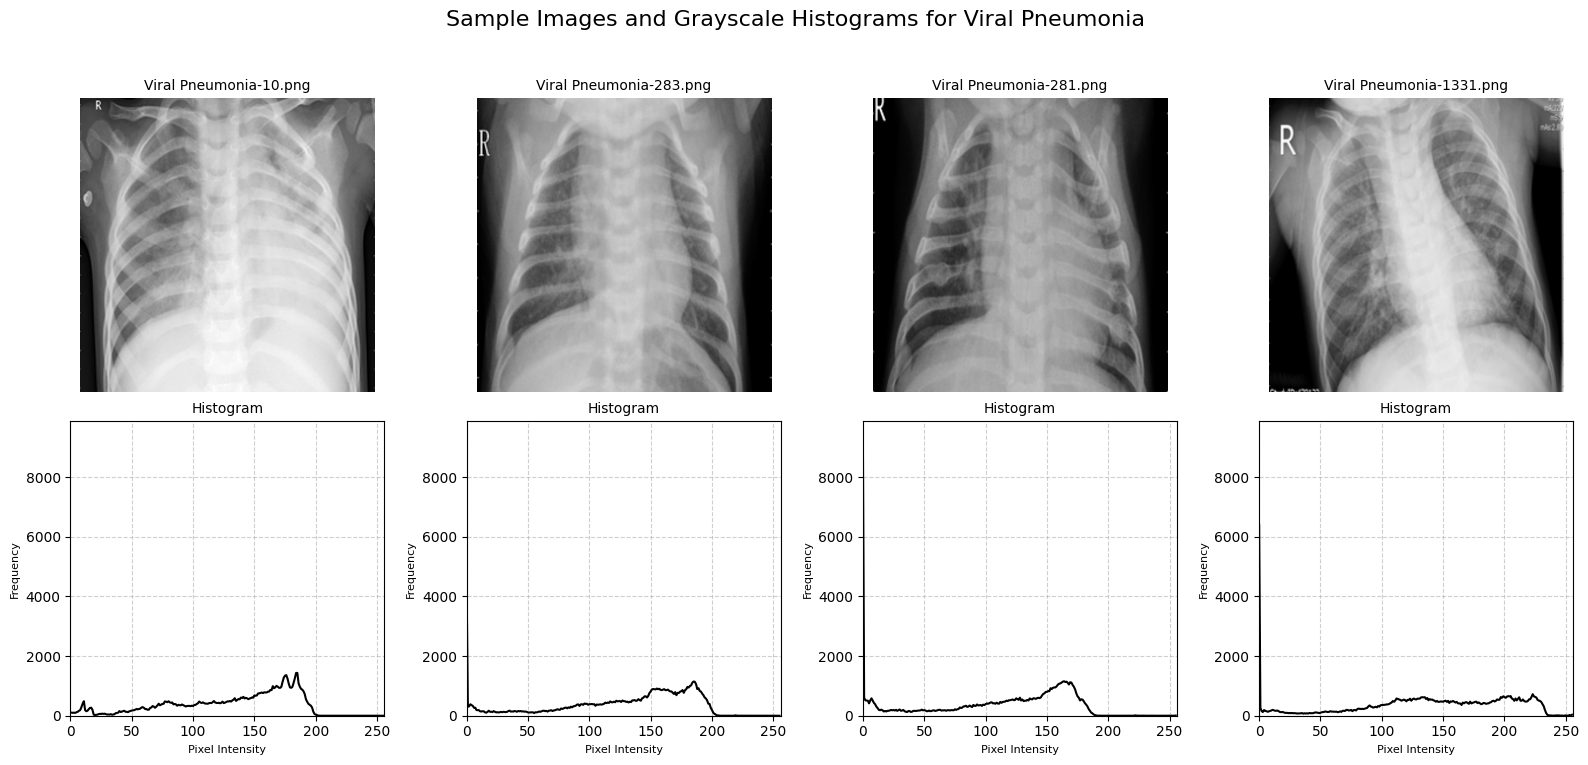

Finished displaying sample images and their grayscale histograms by category.


In [36]:
import matplotlib.pyplot as plt

# Loop through each category to display images and their histograms
current_category = None
fig_num = 0

for item in selected_images_data:
    category = item['category']

    # If the category changes, start a new figure for the new category
    if category != current_category:
        if current_category is not None:
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()

        current_category = category
        fig_num += 1
        # Create a figure with 2 rows and 4 columns for each category
        # First row for images, second row for histograms
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        fig.suptitle(f'Sample Images and Grayscale Histograms for {category}', fontsize=16)
        plot_idx = 0

    # Get the image array and histogram data
    img_array = item['grayscale_image_array']
    hist_values = item['histogram_values']
    bin_edges = item['histogram_bin_edges']

    # Display the grayscale image in the first row
    axes[0, plot_idx].imshow(img_array, cmap='gray')
    axes[0, plot_idx].set_title(item['file_name'], fontsize=10)
    axes[0, plot_idx].axis('off')

    # Display the histogram in the second row
    axes[1, plot_idx].plot(bin_edges[:-1], hist_values, color='black')
    axes[1, plot_idx].set_title('Histogram', fontsize=10)
    axes[1, plot_idx].set_xlabel('Pixel Intensity', fontsize=8)
    axes[1, plot_idx].set_ylabel('Frequency', fontsize=8)
    axes[1, plot_idx].set_xlim([0, 256])
    axes[1, plot_idx].set_ylim([0, max_frequency]) # Set y-axis limit
    axes[1, plot_idx].grid(True, linestyle='--', alpha=0.6)

    plot_idx += 1

# Display the last figure
if current_category is not None:
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("Finished displaying sample images and their grayscale histograms by category.")

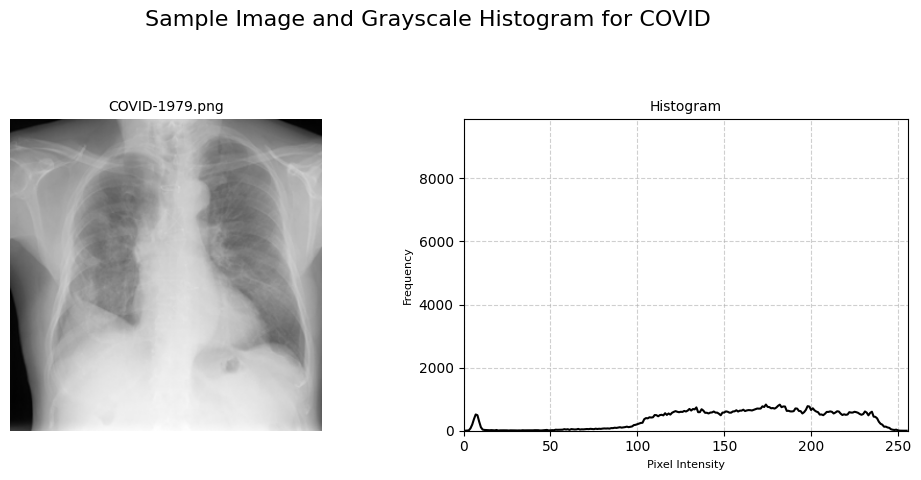

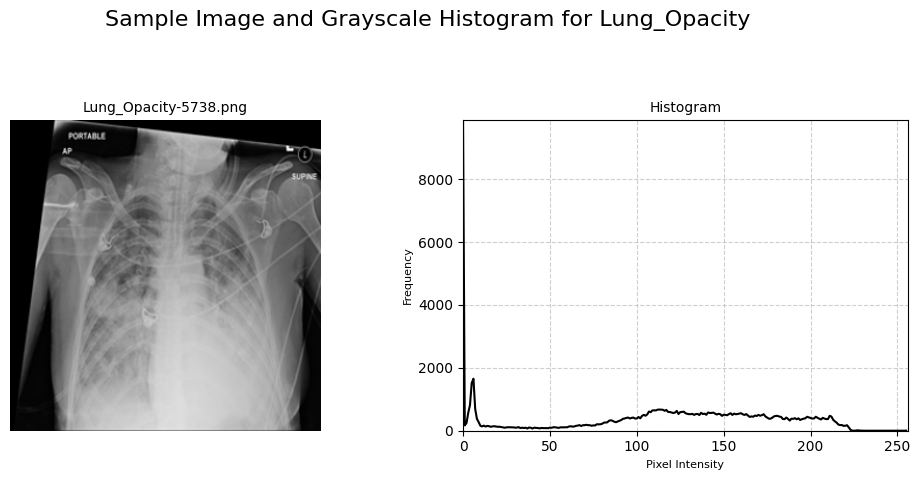

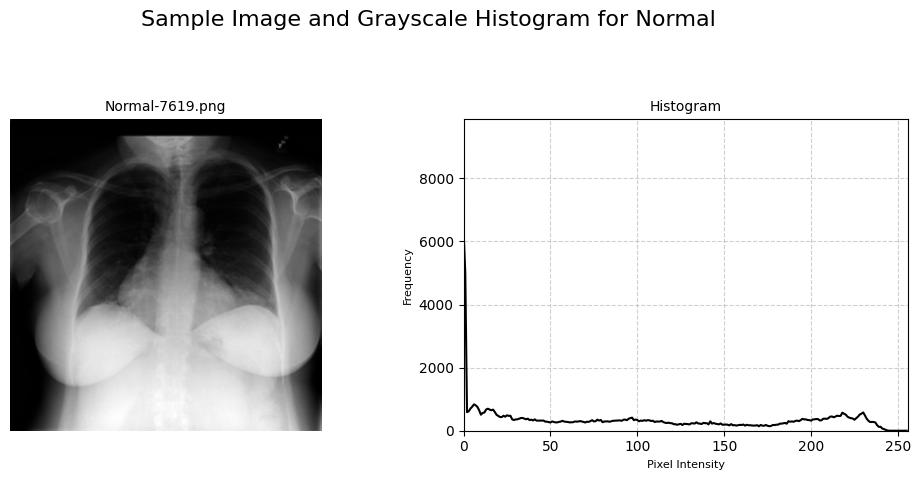

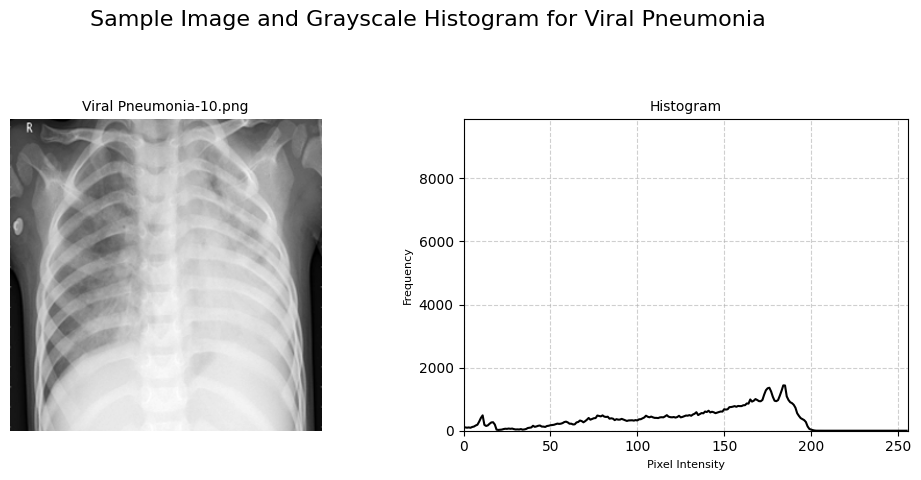

Finished displaying one sample image and its grayscale histogram per category.


In [37]:
import matplotlib.pyplot as plt

# Keep track of categories already plotted
processed_categories = set()

for item in selected_images_data:
    category = item['category']

    # Process only one image per category
    if category not in processed_categories:
        processed_categories.add(category)

        img_array = item['grayscale_image_array']
        hist_values = item['histogram_values']
        bin_edges = item['histogram_bin_edges']

        # Create a figure with 1 row and 2 columns for the image and its histogram
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f'Sample Image and Grayscale Histogram for {category}', fontsize=16)

        # Display the grayscale image in the first subplot
        axes[0].imshow(img_array, cmap='gray')
        axes[0].set_title(item['file_name'], fontsize=10)
        axes[0].axis('off')

        # Display the histogram in the second subplot
        axes[1].plot(bin_edges[:-1], hist_values, color='black')
        axes[1].set_title('Histogram', fontsize=10)
        axes[1].set_xlabel('Pixel Intensity', fontsize=8)
        axes[1].set_ylabel('Frequency', fontsize=8)
        axes[1].set_xlim([0, 256])
        axes[1].set_ylim([0, max_frequency]) # Set y-axis limit
        axes[1].grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout(rect=[0, 0.03, 1, 0.9])
        plt.show()

print("Finished displaying one sample image and its grayscale histogram per category.")

###**Je vais afficher une image en niveaux de gris accompagnée de son histogramme pour chaque catégorie, avec les catégories l'une au-dessus de l'autre et l'image et l'histogramme côte à côte.**

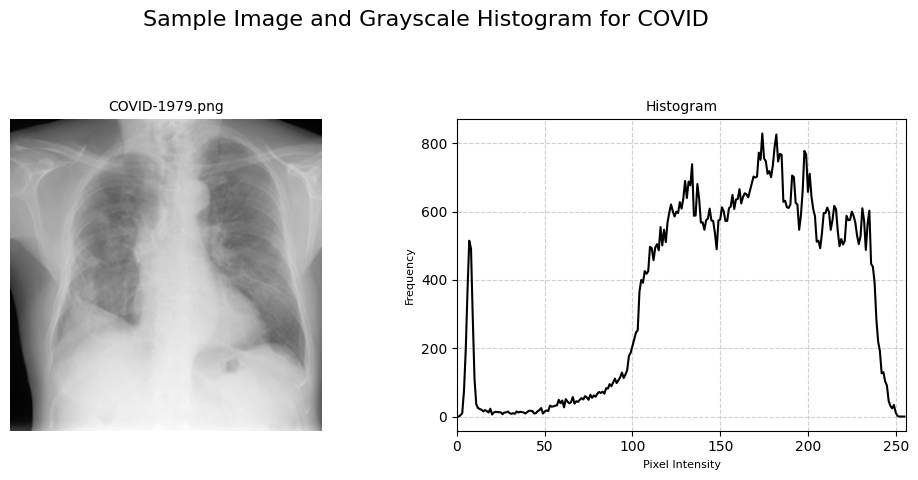

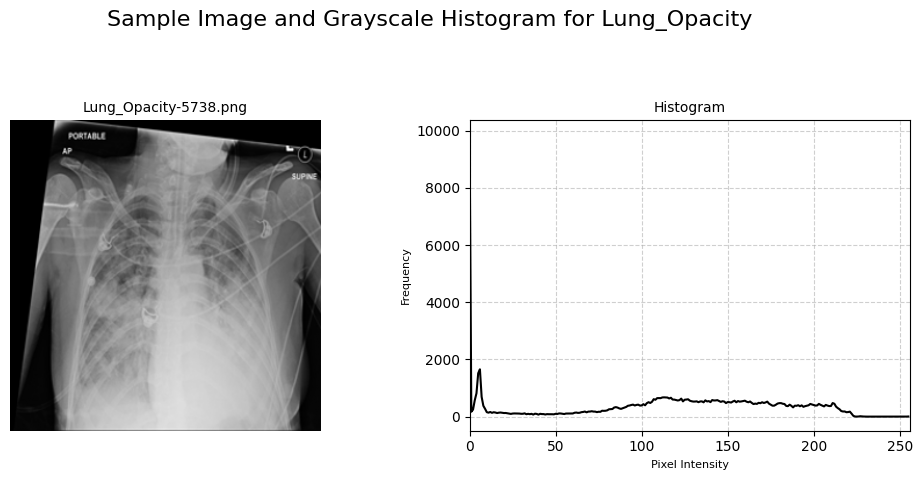

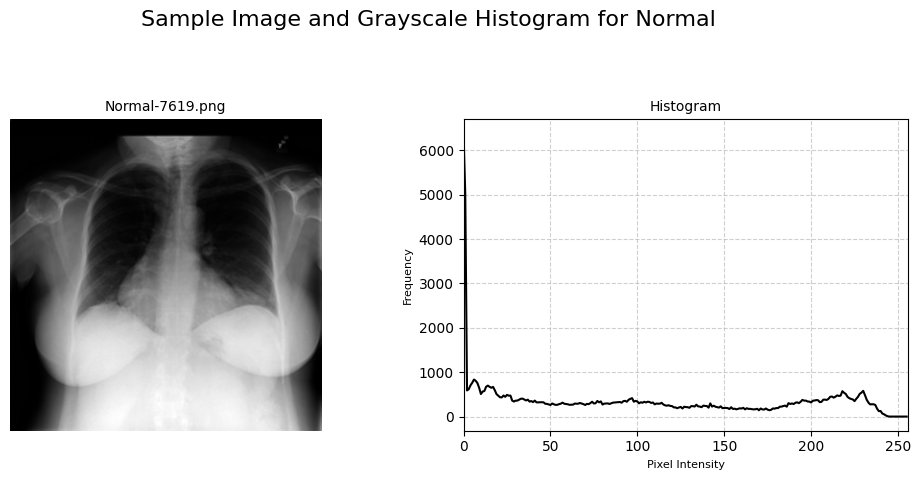

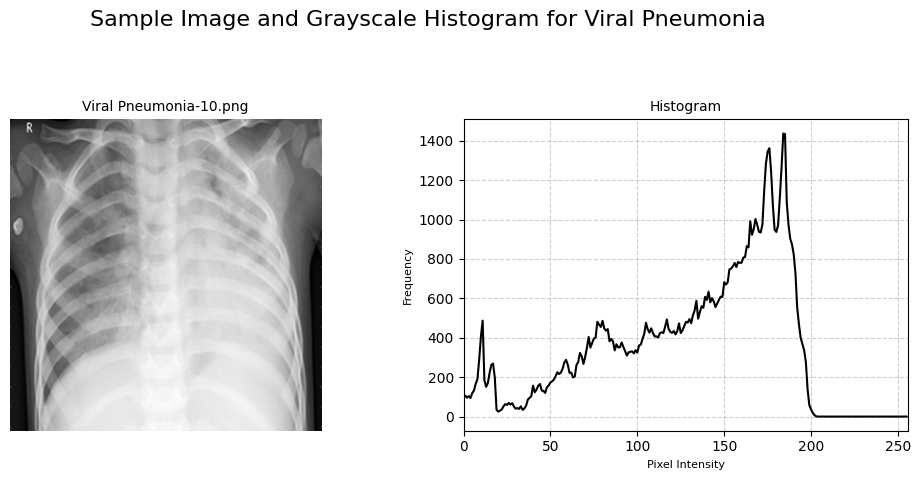

Finished displaying one sample image and its grayscale histogram per category.


In [38]:
import matplotlib.pyplot as plt

# Keep track of categories already plotted
processed_categories = set()

for item in selected_images_data:
    category = item['category']

    # Process only one image per category
    if category not in processed_categories:
        processed_categories.add(category)

        img_array = item['grayscale_image_array']
        hist_values = item['histogram_values']
        bin_edges = item['histogram_bin_edges']

        # Create a figure with 1 row and 2 columns for the image and its histogram
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f'Sample Image and Grayscale Histogram for {category}', fontsize=16)

        # Display the grayscale image in the first subplot
        axes[0].imshow(img_array, cmap='gray')
        axes[0].set_title(item['file_name'], fontsize=10)
        axes[0].axis('off')

        # Display the histogram in the second subplot
        axes[1].plot(bin_edges[:-1], hist_values, color='black')
        axes[1].set_title('Histogram', fontsize=10)
        axes[1].set_xlabel('Pixel Intensity', fontsize=8)
        axes[1].set_ylabel('Frequency', fontsize=8)
        axes[1].set_xlim([0, 256])
        axes[1].grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout(rect=[0, 0.03, 1, 0.9])
        plt.show()

print("Finished displaying one sample image and its grayscale histogram per category.")

### Le plan consiste à filtrer les images par luminosité pour chaque catégorie dans trois plages : faible, moyenne et élevée (0–50, 100–150, 200–250). Ensuite, pour chaque catégorie, une image aléatoire sera sélectionnée dans chacune de ces plages de luminosité. Ces images sélectionnées seront chargées en niveaux de gris, leurs histogrammes seront calculés, puis les images et leurs histogrammes seront affichés dans un graphique composite, en garantissant des limites cohérentes pour l’axe des ordonnées des histogrammes. Enfin, des observations sur les différences de luminosité entre les catégories seront résumées.


### **Filter Images par limuninosité**

**Filtrer les images du `luminosity_df` en trois groupes pour chaque catégorie selon leur luminosité moyenne : 0–50, 100–150 et 200–250. Stocker les chemins de fichiers correspondant à ces images filtrées.**



In [39]:
import os

# 1. Initialize an empty dictionary to store the filtered image information
filtered_images_by_luminosity = {}

# 2. Define three luminosity ranges and their boundaries
luminosity_ranges = {
    'low': {'min': 0, 'max': 50},
    'medium': {'min': 100, 'max': 150},
    'high': {'min': 200, 'max': 250}
}

# Assuming 'categories' and 'image_paths' are available from previous steps
# Assuming 'luminosity_df' is available from previous steps

# 3. Iterate through each unique 'category' present in the luminosity_df.
for category in categories:
    filtered_images_by_luminosity[category] = {}

    # Get the image directory for the current category
    current_image_dir = image_paths[f'{category}_images']

    # 4. For each category, filter the luminosity_df to create three sub-DataFrames
    for range_name, lum_range in luminosity_ranges.items():
        min_lum = lum_range['min']
        max_lum = lum_range['max']

        # Filter images for the current category and luminosity range
        filtered_df = luminosity_df[
            (luminosity_df['category'] == category) &
            (luminosity_df['mean_luminosity'] >= min_lum) &
            (luminosity_df['mean_luminosity'] < max_lum)
        ]

        # Store the results for this range within the category
        filtered_images_by_luminosity[category][range_name] = []

        for index, row in filtered_df.iterrows():
            file_name = row['file_name']
            mean_luminosity = row['mean_luminosity']

            # 5. Construct its full `image_path`
            image_path = os.path.join(current_image_dir, file_name)

            # 6. Store the information
            filtered_images_by_luminosity[category][range_name].append({
                'file_name': file_name,
                'mean_luminosity': mean_luminosity,
                'image_path': image_path
            })

print("Images filtered by luminosity ranges for each category.")

# Optional: Print a summary of the counts for verification
print("\nSummary of filtered images:")
for category, ranges in filtered_images_by_luminosity.items():
    print(f"  Category: {category}")
    for range_name, images_list in ranges.items():
        print(f"    {range_name.capitalize()} luminosity (count): {len(images_list)}")


Images filtered by luminosity ranges for each category.

Summary of filtered images:
  Category: COVID
    Low luminosity (count): 5
    Medium luminosity (count): 2031
    High luminosity (count): 7
  Category: Lung_Opacity
    Low luminosity (count): 15
    Medium luminosity (count): 4332
    High luminosity (count): 2
  Category: Normal
    Low luminosity (count): 7
    Medium luminosity (count): 7536
    High luminosity (count): 1
  Category: Viral Pneumonia
    Low luminosity (count): 0
    Medium luminosity (count): 1109
    High luminosity (count): 0


**Je vais sélectionner une image aléatoire dans chaque plage de luminosité (faible, moyenne, élevée) pour chaque catégorie, stocker leurs informations, puis procéder au chargement des images et au calcul de leurs histogrammes.**:


In [40]:
import random

# Initialize a dictionary to store the selected random image from each range
selected_random_images_for_plotting = {}

# Loop through each category in the filtered_images_by_luminosity dictionary
for category, ranges_data in filtered_images_by_luminosity.items():
    selected_random_images_for_plotting[category] = {}

    # Loop through each luminosity range (low, medium, high)
    for range_name, images_list in ranges_data.items():
        # Select one random image if the list is not empty
        if images_list:
            selected_image = random.choice(images_list)
            selected_random_images_for_plotting[category][range_name] = selected_image
        else:
            print(f"Warning: No images found for {range_name} luminosity in category {category}.")
            selected_random_images_for_plotting[category][range_name] = None

print("One random image selected from each luminosity range for each category.")

# Optional: Print the selected images for verification
print("\nSelected Random Images for Plotting:")
for category, ranges in selected_random_images_for_plotting.items():
    print(f"  Category: {category}")
    for range_name, image_info in ranges.items():
        if image_info:
            print(f"    {range_name.capitalize()} luminosity: {image_info['file_name']} (Mean Lum: {image_info['mean_luminosity']:.2f})")
        else:
            print(f"    {range_name.capitalize()} luminosity: No image selected")


One random image selected from each luminosity range for each category.

Selected Random Images for Plotting:
  Category: COVID
    Low luminosity: COVID-1757.png (Mean Lum: 42.05)
    Medium luminosity: COVID-2692.png (Mean Lum: 109.90)
    High luminosity: COVID-2111.png (Mean Lum: 216.34)
  Category: Lung_Opacity
    Low luminosity: Lung_Opacity-855.png (Mean Lum: 48.93)
    Medium luminosity: Lung_Opacity-5503.png (Mean Lum: 149.77)
    High luminosity: Lung_Opacity-5040.png (Mean Lum: 229.14)
  Category: Normal
    Low luminosity: Normal-2121.png (Mean Lum: 39.76)
    Medium luminosity: Normal-1768.png (Mean Lum: 106.72)
    High luminosity: Normal-4308.png (Mean Lum: 201.85)
  Category: Viral Pneumonia
    Low luminosity: No image selected
    Medium luminosity: Viral Pneumonia-426.png (Mean Lum: 123.22)
    High luminosity: No image selected


### Load Images and Compute Histograms



**Je vais parcourir le dictionnaire selected_random_images_for_plotting, charger chaque image, la convertir en niveaux de gris, calculer son histogramme et stocker les résultats.**


In [41]:
import numpy as np
from PIL import Image

# Initialize a dictionary to store the processed image data for plotting
processed_images_for_plotting = {}

# Iterate through each category in the selected_random_images_for_plotting dictionary
for category, ranges_data in selected_random_images_for_plotting.items():
    processed_images_for_plotting[category] = {}

    # Iterate through each luminosity range (low, medium, high)
    for range_name, image_info in ranges_data.items():
        if image_info:
            image_path = image_info['image_path']
            file_name = image_info['file_name']
            mean_luminosity = image_info['mean_luminosity']

            try:
                # Load image and convert to grayscale
                img = Image.open(image_path).convert('L') # 'L' for grayscale
                img_array = np.array(img)

                # Compute histogram
                hist_values, bin_edges = np.histogram(img_array.flatten(), bins=256, range=[0, 256])

                # Store the processed data
                processed_images_for_plotting[category][range_name] = {
                    'file_name': file_name,
                    'mean_luminosity': mean_luminosity,
                    'grayscale_image_array': img_array,
                    'histogram_values': hist_values,
                    'histogram_bin_edges': bin_edges
                }
            except Exception as e:
                print(f"Error processing image {file_name} for category {category}, range {range_name}: {e}")
                processed_images_for_plotting[category][range_name] = None
        else:
            processed_images_for_plotting[category][range_name] = None # Ensure None is propagated for empty ranges

print("Selected random images loaded in grayscale and their histograms computed.")

# Optional: Print a sample of processed data for verification
print("\nSample of processed_images_for_plotting:")
for category, ranges in processed_images_for_plotting.items():
    for range_name, img_data in ranges.items():
        if img_data:
            print(f"  Category: {category}, Range: {range_name.capitalize()}")
            print(f"    File Name: {img_data['file_name']}")
            print(f"    Mean Luminosity: {img_data['mean_luminosity']:.2f}")
            print(f"    Image Array Shape: {img_data['grayscale_image_array'].shape}")
            print(f"    Histogram Values (first 5): {img_data['histogram_values'][:5]}")
            break # Only show one sample per category


Selected random images loaded in grayscale and their histograms computed.

Sample of processed_images_for_plotting:
  Category: COVID, Range: Low
    File Name: COVID-1757.png
    Mean Luminosity: 42.05
    Image Array Shape: (299, 299)
    Histogram Values (first 5): [8689 7275 6262  524  497]
  Category: Lung_Opacity, Range: Low
    File Name: Lung_Opacity-855.png
    Mean Luminosity: 48.93
    Image Array Shape: (299, 299)
    Histogram Values (first 5): [49624   104    74    81   218]
  Category: Normal, Range: Low
    File Name: Normal-2121.png
    Mean Luminosity: 39.76
    Image Array Shape: (299, 299)
    Histogram Values (first 5): [44884   348  2205   587   599]
  Category: Viral Pneumonia, Range: Medium
    File Name: Viral Pneumonia-426.png
    Mean Luminosity: 123.22
    Image Array Shape: (299, 299)
    Histogram Values (first 5): [6371  380  256  236  233]


**Je vais parcourir les images traitées, créer une figure pour chaque catégorie, puis pour chaque plage de luminosité, afficher l’image et son histogramme correspondant dans un sous-graphe. Je calculerai également la fréquence maximale parmi tous les histogrammes afin de définir une limite d’axe des ordonnées cohérente pour l’ensemble des graphiques d’histogrammes, ce qui améliore la comparabilité.**



Maximum histogram frequency for consistent plotting: 49624


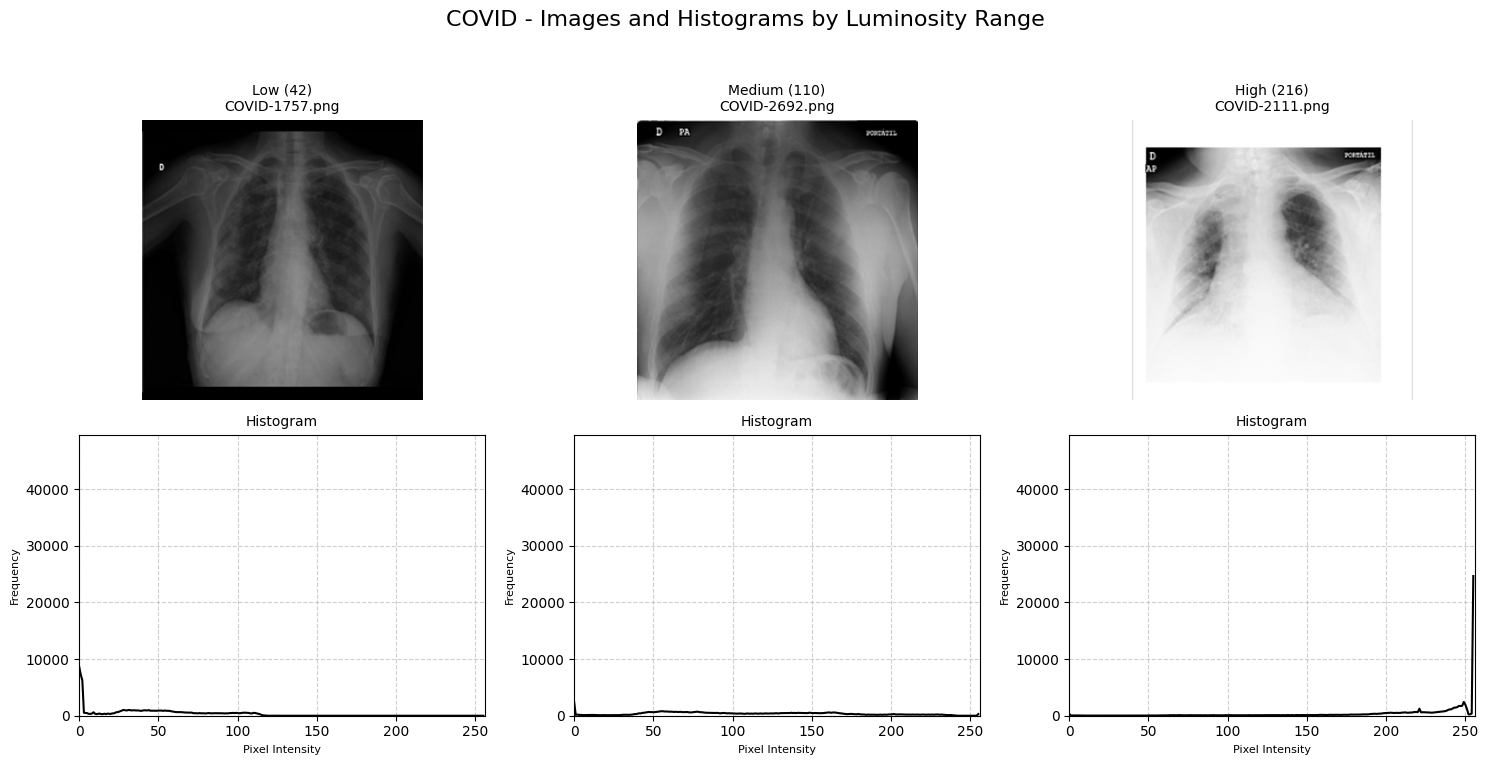

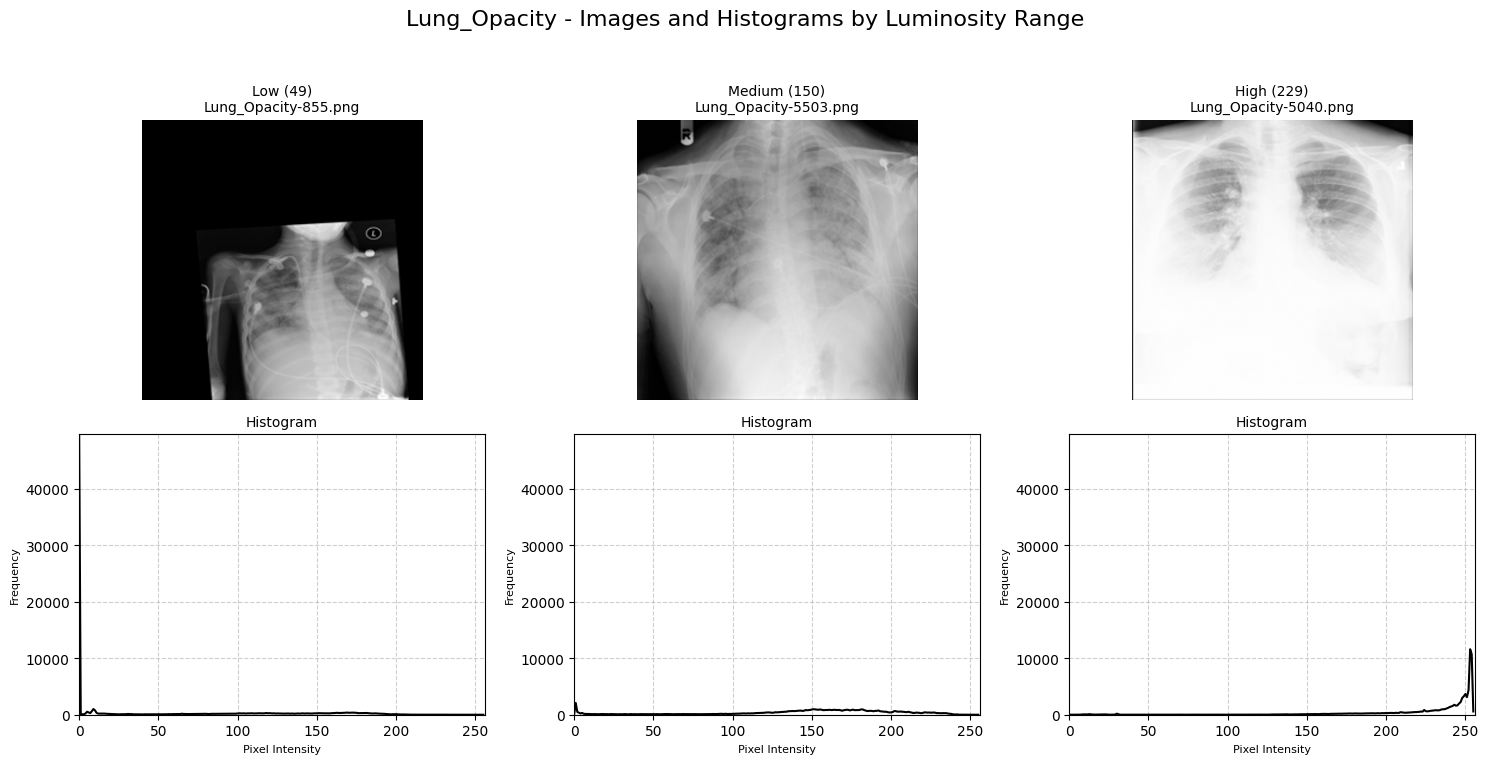

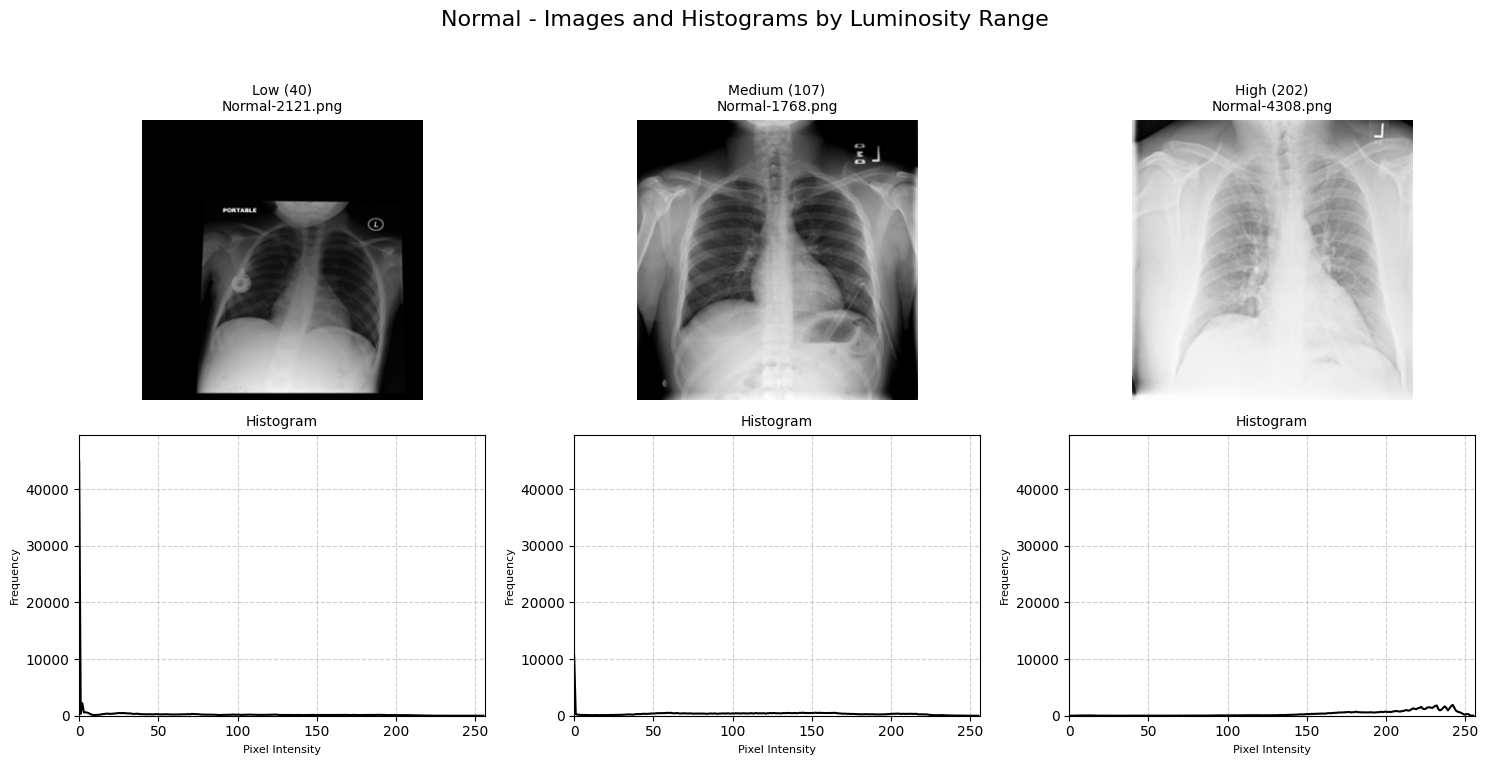

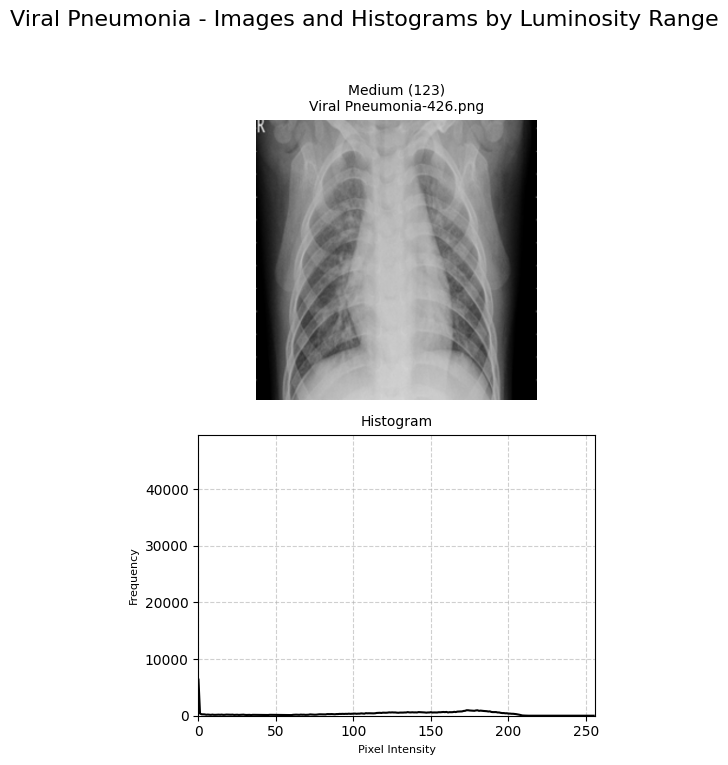

Finished displaying images and histograms by luminosity range for each category.


In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Determine the maximum frequency across all histograms for consistent y-axis limits
max_hist_frequency = 0
for category, ranges_data in processed_images_for_plotting.items():
    for range_name, img_data in ranges_data.items():
        if img_data and 'histogram_values' in img_data:
            max_hist_frequency = max(max_hist_frequency, img_data['histogram_values'].max())

print(f"Maximum histogram frequency for consistent plotting: {max_hist_frequency}")

# Loop through each category to display the images and histograms
for category, ranges_data in processed_images_for_plotting.items():
    # Determine how many subplots are needed for this category
    # Count only ranges that actually have an image selected
    num_ranges_with_images = sum(1 for data in ranges_data.values() if data is not None)

    if num_ranges_with_images == 0:
        print(f"No images to plot for category: {category}")
        continue

    # Create a figure for each category. Each category will have a row of images and a row of histograms.
    # Total rows = 2 (image + histogram), Total cols = num_ranges_with_images
    fig, axes = plt.subplots(2, num_ranges_with_images, figsize=(5 * num_ranges_with_images, 8))
    fig.suptitle(f'{category} - Images and Histograms by Luminosity Range', fontsize=16)

    plot_idx = 0
    # Order of ranges for plotting
    ordered_ranges = ['low', 'medium', 'high']

    for range_name in ordered_ranges:
        img_data = ranges_data.get(range_name)

        # Skip if no image was selected for this range
        if img_data is None:
            # If there are still plots to make, we should ensure the axes are correctly indexed
            # or manage the subplot creation dynamically based on available images.
            # For simplicity, we'll just skip the column for this empty range if it's not the last.
            # If it's the only one or if it creates an empty column, it needs handling.
            # For a fixed 2x3 grid, we could disable unused axes. Given dynamic num_ranges, this is simpler.
            continue

        # Ensure axes is always a 2D array for consistent indexing
        if num_ranges_with_images == 1:
            ax_img = axes[0]
            ax_hist = axes[1]
        else:
            ax_img = axes[0, plot_idx]
            ax_hist = axes[1, plot_idx]

        img_array = img_data['grayscale_image_array']
        hist_values = img_data['histogram_values']
        bin_edges = img_data['histogram_bin_edges']

        # Display the grayscale image
        ax_img.imshow(img_array, cmap='gray')
        ax_img.set_title(f"{range_name.capitalize()} ({img_data['mean_luminosity']:.0f})\n{img_data['file_name']}", fontsize=10)
        ax_img.axis('off')

        # Display the histogram
        ax_hist.plot(bin_edges[:-1], hist_values, color='black')
        ax_hist.set_title('Histogram', fontsize=10)
        ax_hist.set_xlabel('Pixel Intensity', fontsize=8)
        ax_hist.set_ylabel('Frequency', fontsize=8)
        ax_hist.set_xlim([0, 256])
        ax_hist.set_ylim([0, max_hist_frequency]) # Use consistent y-axis limit
        ax_hist.grid(True, linestyle='--', alpha=0.6)

        plot_idx += 1

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("Finished displaying images and histograms by luminosity range for each category.")